In [2]:
import pandas as pd
import pandas_bokeh
pandas_bokeh.output_notebook()
# File output to "Interactive Plot.html" (see

Loading BokehJS ...

In [3]:
import numpy as np

np.random.seed(42)
df = pd.DataFrame({"Google": np.random.randn(1000)+0.2, 
                   "Apple": np.random.randn(1000)+0.17}, 
                   index=pd.date_range('1/1/2000', periods=1000))
df = df.cumsum()
df = df + 50
df.plot_bokeh(kind="line")       #equivalent to df.plot_bokeh.line()

Figure(id='1002', ...)

In [4]:
df_mapplot = pd.read_csv(r"https://raw.githubusercontent.com/PatrikHlobil/Pandas-Bokeh/master/docs/Testdata/populated%20places/populated_places.csv")
df_mapplot.head()

name  pop_max   latitude   longitude
0        Mesa  1085394  33.423915 -111.736084
1     Sharjah  1103027  25.371383   55.406478
2    Changwon  1081499  35.219102  128.583562
3   Sheffield  1292900  53.366677   -1.499997
4  Abbottabad  1183647  34.149503   73.199501

In [5]:
df_mapplot["size"] = df_mapplot["pop_max"] / 1000000
df_mapplot.plot_bokeh.map(
    x="longitude",
    y="latitude",
    hovertool_string="""<h2> @{name} </h2> 
    
                        <h3> Population: @{pop_max} </h3>""",
    tile_provider="STAMEN_TERRAIN_RETINA",
    size="size", 
    figsize=(900, 600),
    title="World cities with more than 1.000.000 inhabitants")

Figure(id='1245', ...)

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [2]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import pprint as pprint

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [3]:
file_sat_import = 'sat_scores.csv'

In [4]:
from itertools import chain

def get_mulList(*args):
    return map(list,zip(*args))

csv_data = open(file_sat_import,'r')
data = list(csv.reader(csv_data))
sat_dict = dict(zip(data[0],get_mulList(*data[1:])))    
print(sat_dict)

{'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], 'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
#Imports sat_dict into a pandas dataframe
pandas_sat = pd.DataFrame(sat_dict)
pandas_sat.head()

State Rate Verbal Math
0    CT   82    509  510
1    NJ   81    499  513
2    MA   79    511  515
3    NY   77    495  505
4    NH   72    520  516

In [6]:
#Checking dtypes when imported as a dictionary
#In this case they are all objects. In other words pandas did not automatically 
#assign interger to respective rate, verbal and math columns
pandas_sat.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [7]:
#Read in original data file through pandas using read_csv command
pandas_alt_sat = pd.read_csv(file_sat_import)
pandas_alt_sat.head()

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516

In [8]:
#Checking dtypes when imported using the read_csv approach
#In this case they pandas correctly assigned  
#intergers to the rate, verbal and math columns
pandas_alt_sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [9]:
#Checking unique options in state. 'All' in data frame should be removed for later analyses as not a US state/territoryu
print(pandas_alt_sat['State'].unique())
#Checking count of states, which shows that there are 52 types one of which is All, which needs to be removed. 
print(pandas_alt_sat['State'].count())
#Need to consider that DC is also listed, which is not technically a state.
print(pandas_alt_sat.shape)

['CT' 'NJ' 'MA' 'NY' 'NH' 'RI' 'PA' 'VT' 'ME' 'VA' 'DE' 'MD' 'NC' 'GA'
 'IN' 'SC' 'DC' 'OR' 'FL' 'WA' 'TX' 'HI' 'AK' 'CA' 'AZ' 'NV' 'CO' 'OH'
 'MT' 'WV' 'ID' 'TN' 'NM' 'IL' 'KY' 'WY' 'MI' 'MN' 'KS' 'AL' 'NE' 'OK'
 'MO' 'LA' 'WI' 'AR' 'UT' 'IA' 'SD' 'ND' 'MS' 'All']
52
(52, 4)


In [10]:
#Itdentifies index number associated with 'All' for state and returns the index label associated with this and appends
#to a remove_rows_index variable
Remove_rows_index = pandas_alt_sat[pandas_alt_sat['State'] == "All"].index.tolist()
Remove_rows_index

[51]

In [11]:
#Drops rows that meet Remove_rows_index for final data set to work on.
cleaned_sat = pandas_alt_sat.drop(Remove_rows_index, axis=0)
cleaned_sat['State'].unique()

array(['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE',
       'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI',
       'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM',
       'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA',
       'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS'], dtype=object)

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [12]:
cleaned_sat.head(10)

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
6    PA    71     500   499
7    VT    69     511   506
8    ME    69     506   500
9    VA    68     510   501

**Answer:**

* **Column 1**: The first column contain the 50 states of the US plus DC, which technically is not a state  but is usually included in most reports that focus on statistical information across US states (https://time.com/4296175/washington-dc-statehood-history/).

* **Column 2**: Rate of completion of SAT exams in the state.

* **Column 3**: Median of the Verbal component of the Scholastic Aptitude Test (SAT), which is a standardized test of academic ability and general intellectual ability.

* **Column 4**: Median of the Math component of the Scholastic Aptitude Test (SAT).

The range of SAT scores is 200 to 800 for each sub-section on the test. SAT Scores are standardised scores.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [13]:
sat_dictionary = {}

In [14]:
list(cleaned_sat.columns) 

['State', 'Rate', 'Verbal', 'Math']

In [15]:
#These are descriptions for use in the data dictionary.
state_description = "Contains the 50 states of the US plus DC"
state_rate = 'Rate of completion of SAT exams in the state'
sat_verbal = 'Median of the Verbal component of the Scholastic Aptitude Test (SAT)'
sat_math = 'Median of the Math component of the Scholastic Aptitude Test (SAT)'

#Creates 
counter = 0
for i in list(cleaned_sat.columns):
    counter +=1
    sat_dictionary.update({counter:{'Column Name': i,'Type': cleaned_sat.dtypes[i],'Description':""}})

#Adds a dictionary key that proivides the shape of the data set
sat_dictionary.update({counter+1:{'DataFrame Shape': cleaned_sat.shape}})

#Updates the descriptions associated with each column
#Could be improved by finding associated keys rather than index values due to if any changes in column order occur 
sat_dictionary[1]['Description'] = state_description
sat_dictionary[2]['Description'] = state_rate
sat_dictionary[3]['Description'] = sat_verbal
sat_dictionary[4]['Description'] = sat_math

sat_dictionary  

{1: {'Column Name': 'State',
  'Type': dtype('O'),
  'Description': 'Contains the 50 states of the US plus DC'},
 2: {'Column Name': 'Rate',
  'Type': dtype('int64'),
  'Description': 'Rate of completion of SAT exams in the state'},
 3: {'Column Name': 'Verbal',
  'Type': dtype('int64'),
  'Description': 'Median of the Verbal component of the Scholastic Aptitude Test (SAT)'},
 4: {'Column Name': 'Math',
  'Type': dtype('int64'),
  'Description': 'Median of the Math component of the Scholastic Aptitude Test (SAT)'},
 5: {'DataFrame Shape': (51, 4)}}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [16]:
#Imports seaborn and matplotlib pyplot modules
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Histogram of state rates')

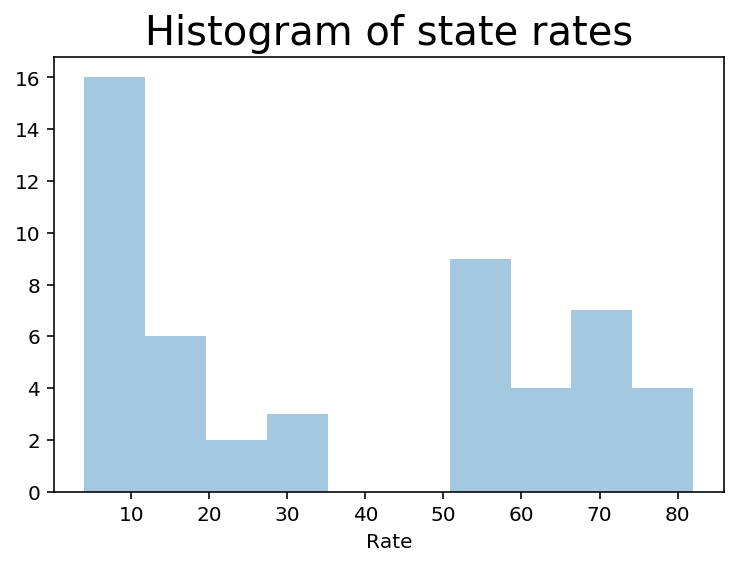

In [17]:
#Plots distribution of Rates column from cleaned_data dataframe
rate_dist = sns.distplot(cleaned_sat['Rate'], kde=False, bins=10)
rate_dist.set_title('Histogram of state rates', fontsize=20)

**Note:** Output is bimodal and suggests two sub-subgroups containing states at high and low level of SAT uptake rates. Possibly could be due to SAT not being the only used assessment instrument in the US. The other is the Scholastic Assessment Test (SAT). This difference may be useful to investigate further.

Text(0.5, 1.0, 'Histogram of Verbal SAT scores')

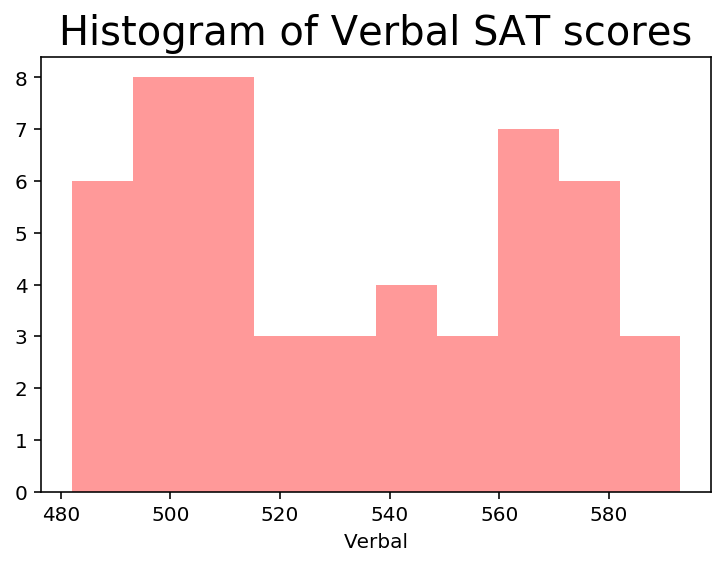

In [18]:
verbal_dist = sns.distplot(cleaned_sat['Verbal'], kde=False, bins=10, color='Red')
verbal_dist.set_title('Histogram of Verbal SAT scores', fontsize=20)

**Note:** Output is also bimodal and suggests two sub-subgroups containing two groups of high and low verbal SAT scores. Possibly aligned to the previous observation above regarding the two state groups. 

Text(0.5, 1.0, 'Histogram of Math SAT scores')

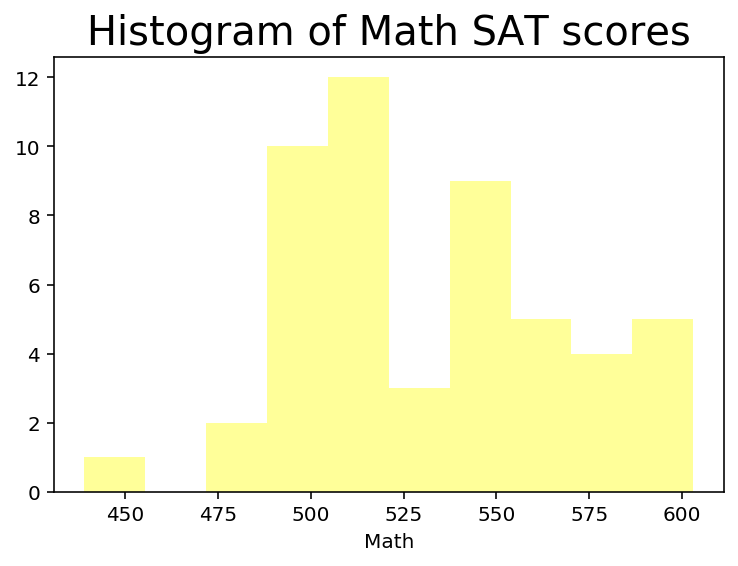

In [19]:
math_dist = sns.distplot(cleaned_sat['Math'], kde=False, bins=10, color='Yellow')
math_dist.set_title('Histogram of Math SAT scores', fontsize=20)

**Note:** Possible outlier at the lower end of Math SAT scores. 

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

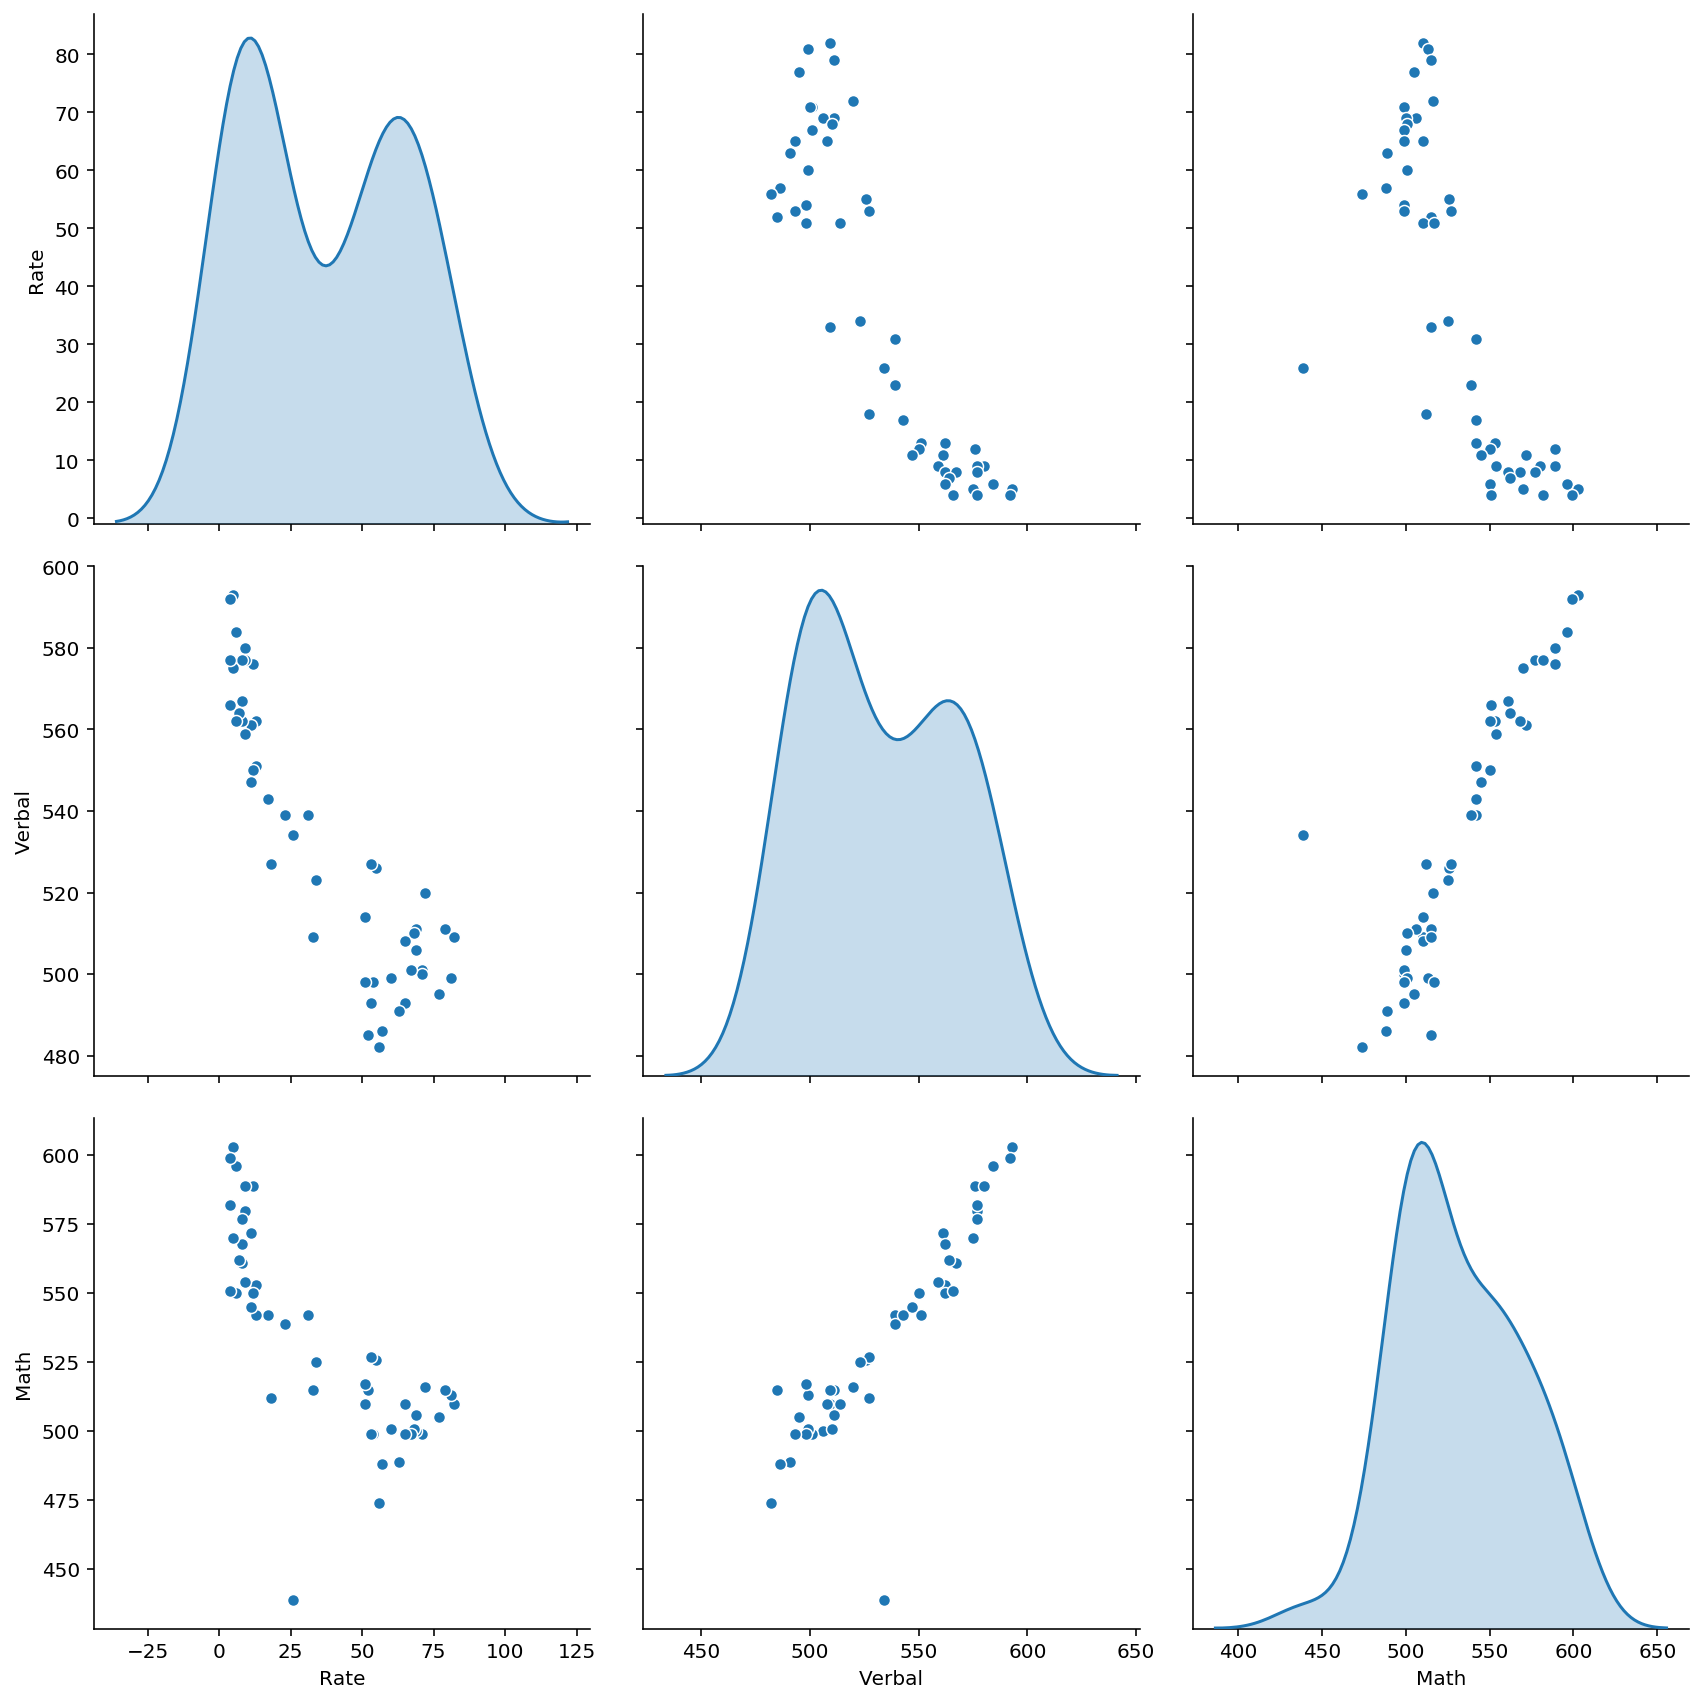

In [20]:
#Visually investigate relationships between variables
sns.pairplot(cleaned_sat, diag_kind='kde', height=4)

**Notes**
* Scatterplots suggest strong negative relationships between rate with maths and verbal. However, caution is warranted as potentially two sub-groups due to some evidence of clustering in the data set into two groups.

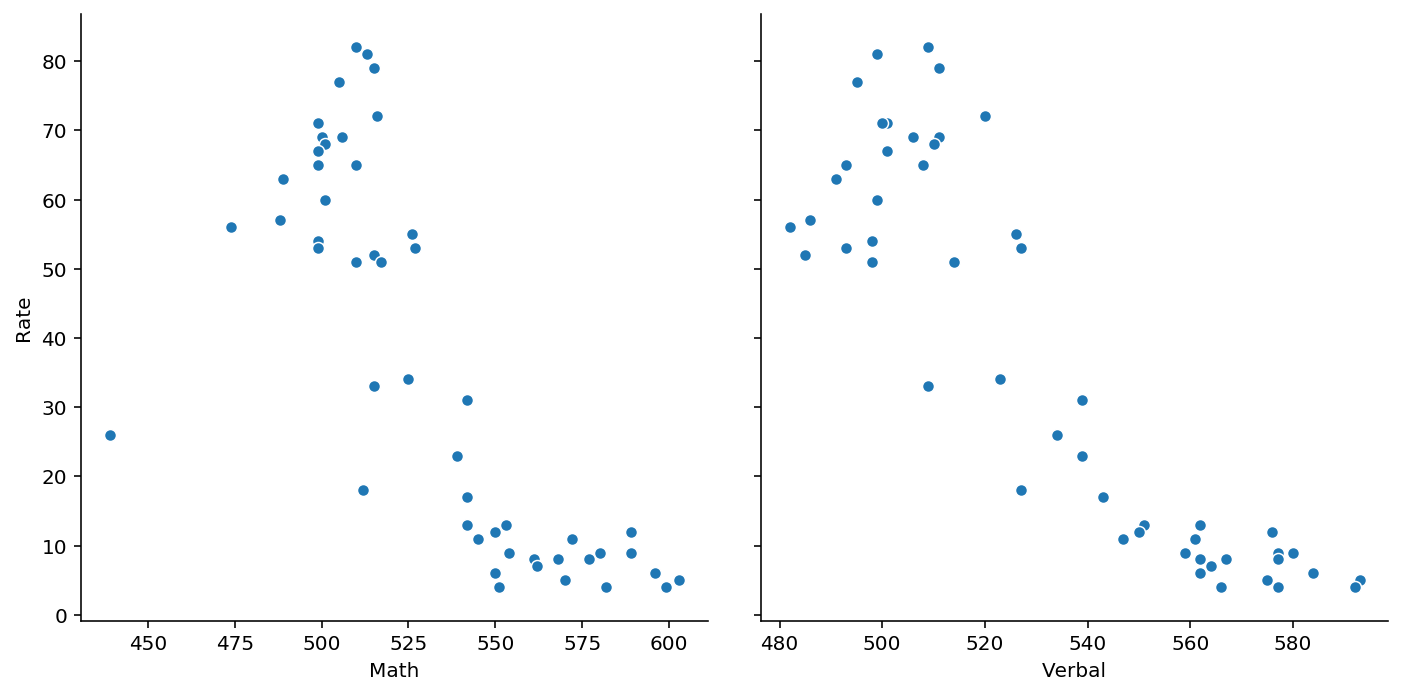

In [21]:
sns.pairplot(cleaned_sat, x_vars=["Math", "Verbal"], y_vars=["Rate"], height=5)

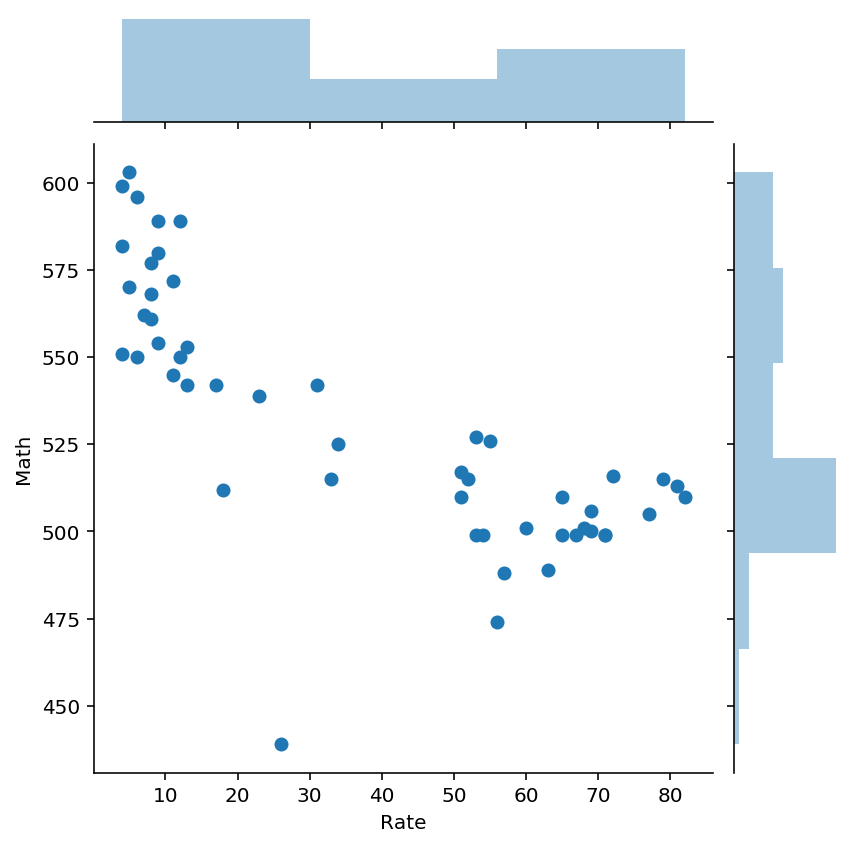

In [22]:
#Joint plots of rate and math
sns.jointplot(x=cleaned_sat['Rate'],y=cleaned_sat['Math'])

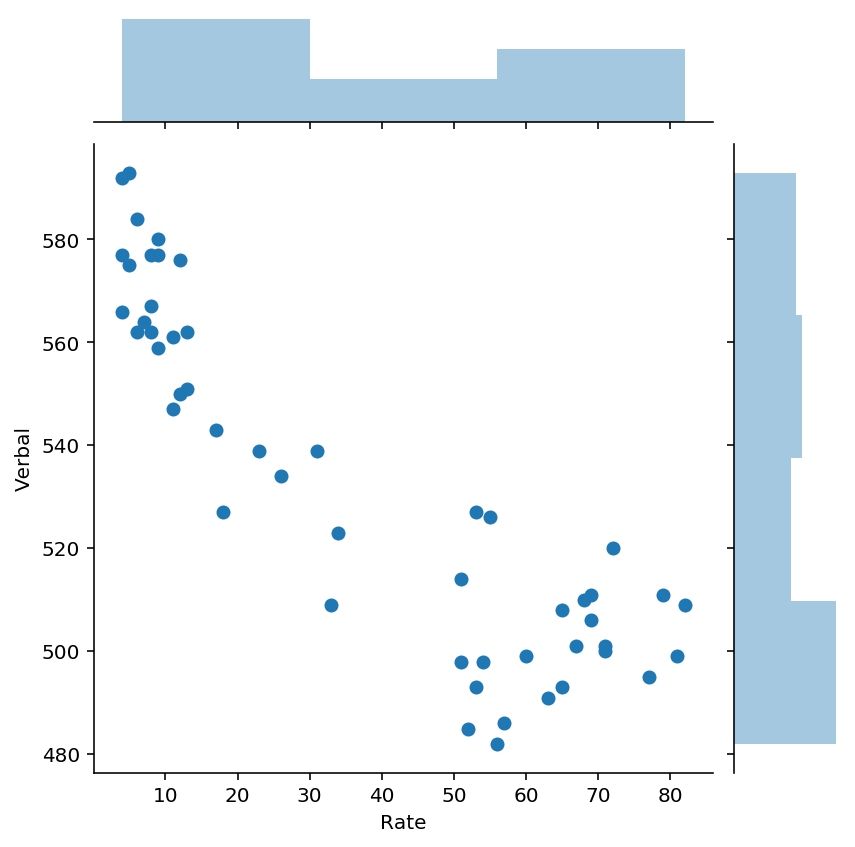

In [23]:
sns.jointplot(x=cleaned_sat['Rate'],y=cleaned_sat['Verbal'])

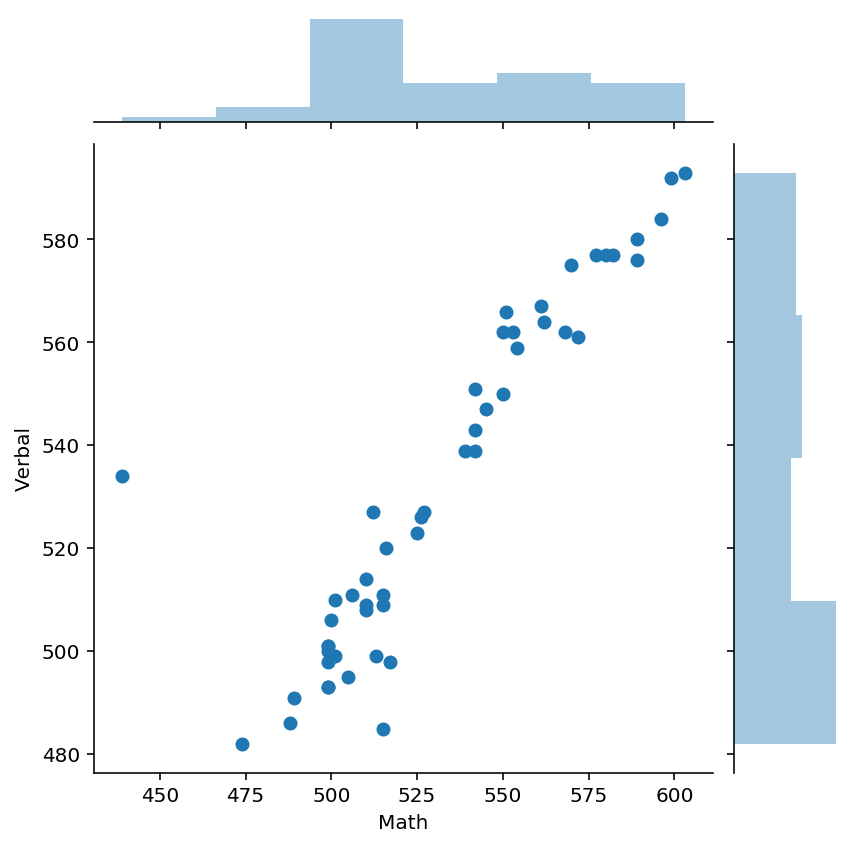

In [24]:
sns.jointplot(x=cleaned_sat['Math'],y=cleaned_sat['Verbal'])

In [1]:
cleaned_sat.head

NameError: name 'cleaned_sat' is not defined

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

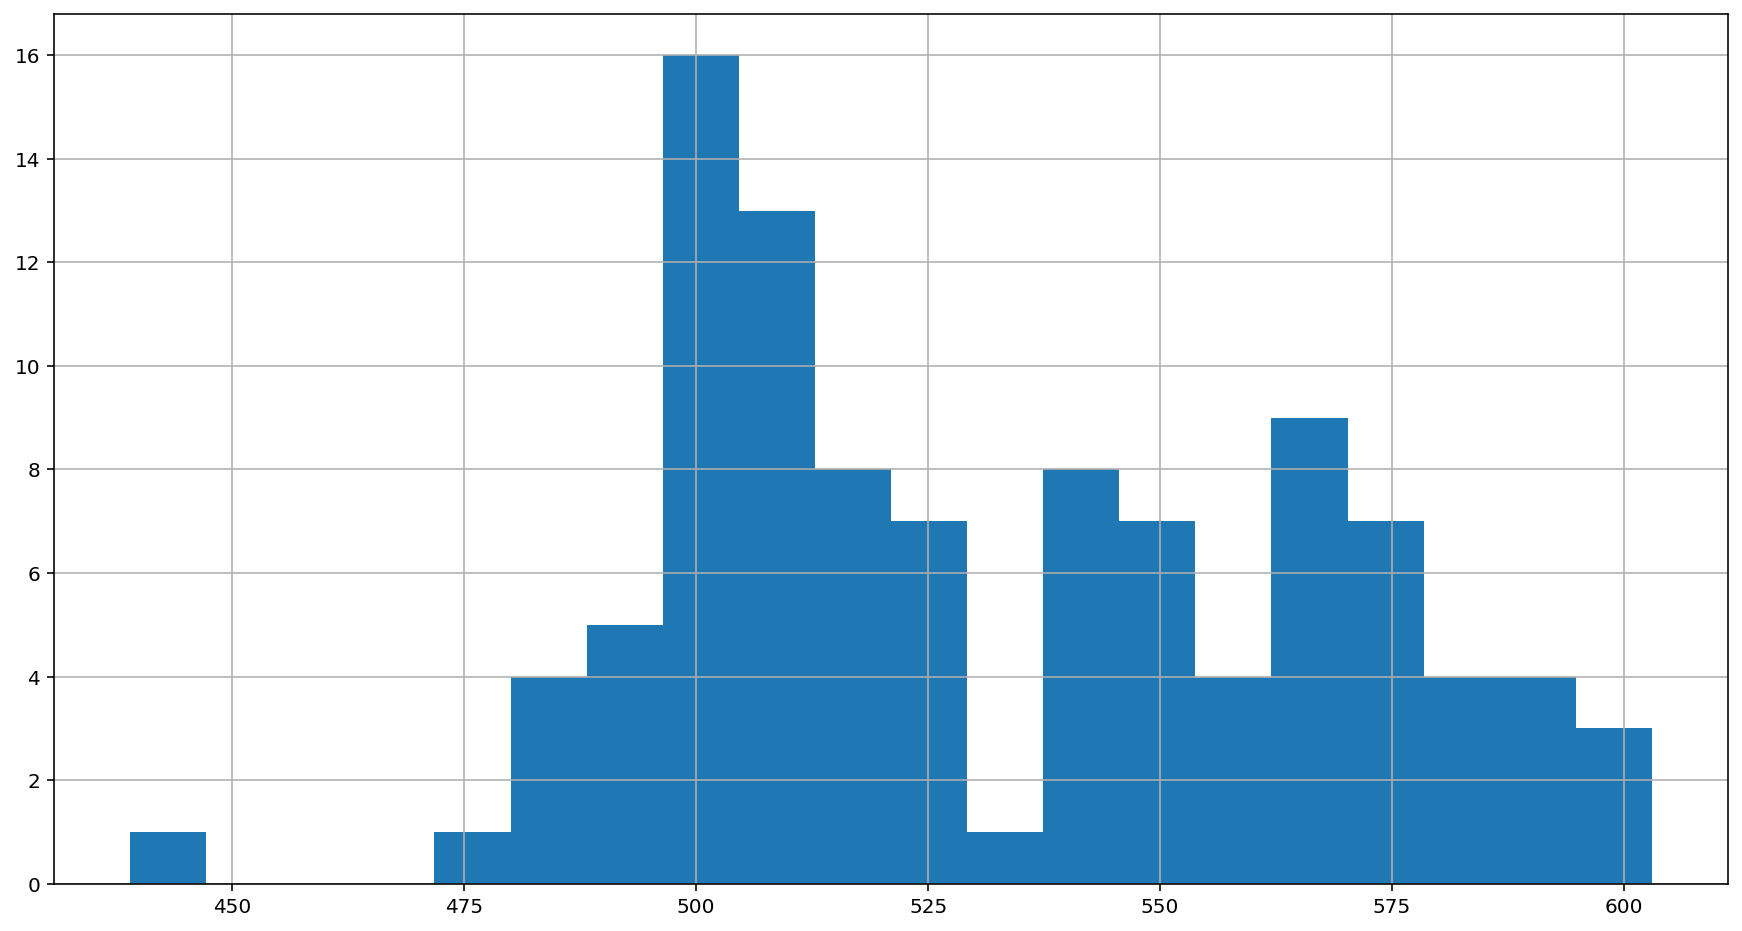

In [26]:
#Creates a stacked histogram with the Verbal and Math columns from the cleaned_sat data set 
cleaned_sat[['Math','Verbal']].unstack().hist(figsize=(15,8), bins=20, stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

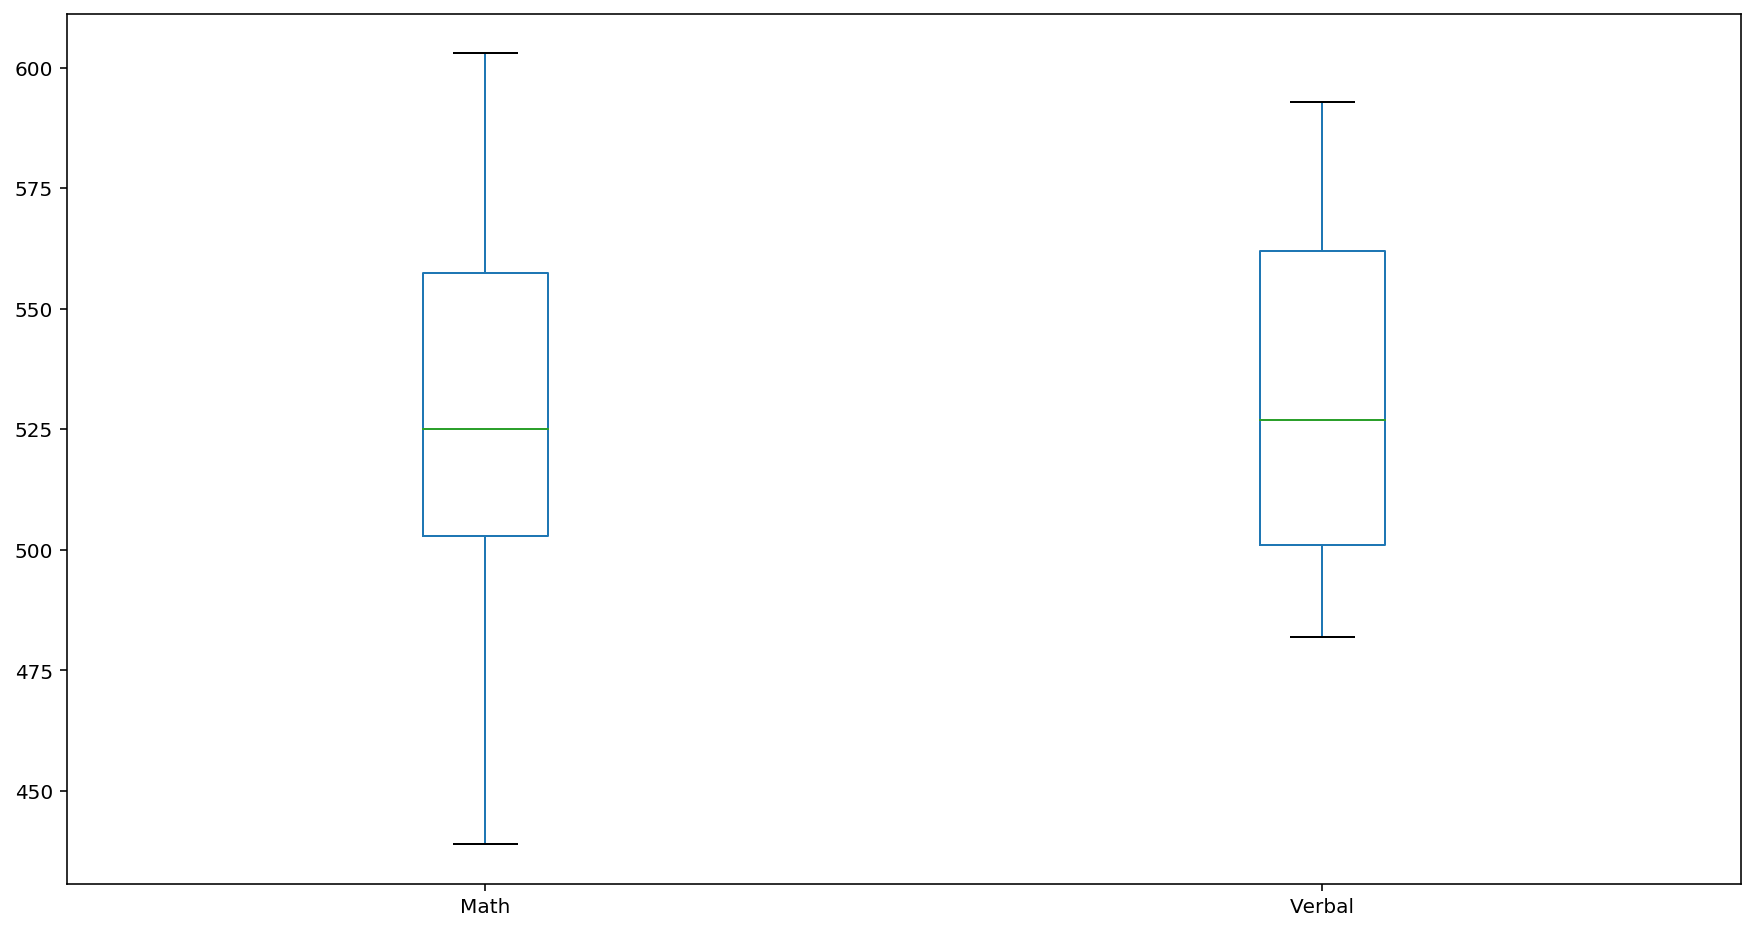

In [27]:
cleaned_sat[['Math','Verbal']].boxplot(figsize=(15,8), grid=False)
# Alternativey could use the following code to achieve same output:
# cleaned_sat.boxplot(figsize=(15,8), grid=False, column=['Verbal', 'Math'])

**Answer**: The core issue with plotting rate on the same chart is that rate is in a different unit of measurement and thus is not directly comparable to Math and Verbal both of which are in the same unit of measurment already (as noted previously, a standardised score between 200-800). To overcome the issue of non-comparable units we could convert all variables to z-scores. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [28]:
#We need to calculate the z-scores for all our variables. 
#To start this, we would need to know the mean and std for each of our variables to use in our conversion.
print(np.mean(cleaned_sat['Rate']))
print(np.std(cleaned_sat['Rate']))

37.0
27.27923867605359


In [29]:
#Create z scores for each variable in our data set.
cleaned_sat['Z_Rate'] = (cleaned_sat['Rate'] - np.mean(cleaned_sat['Rate']))/np.std(cleaned_sat['Rate'])
cleaned_sat['Z_Verbal'] = (cleaned_sat['Verbal'] - np.mean(cleaned_sat['Verbal']))/np.std(cleaned_sat['Verbal'])
cleaned_sat['Z_Math'] = (cleaned_sat['Math'] - np.mean(cleaned_sat['Math']))/np.std(cleaned_sat['Math'])
cleaned_sat.head()

State  Rate  Verbal  Math    Z_Rate  Z_Verbal    Z_Math
0    CT    82     509   510  1.649606 -0.712322 -0.607938
1    NJ    81     499   513  1.612948 -1.015059 -0.524442
2    MA    79     511   515  1.539632 -0.651775 -0.468778
3    NY    77     495   505  1.466317 -1.136154 -0.747098
4    NH    72     520   516  1.283027 -0.379312 -0.440946

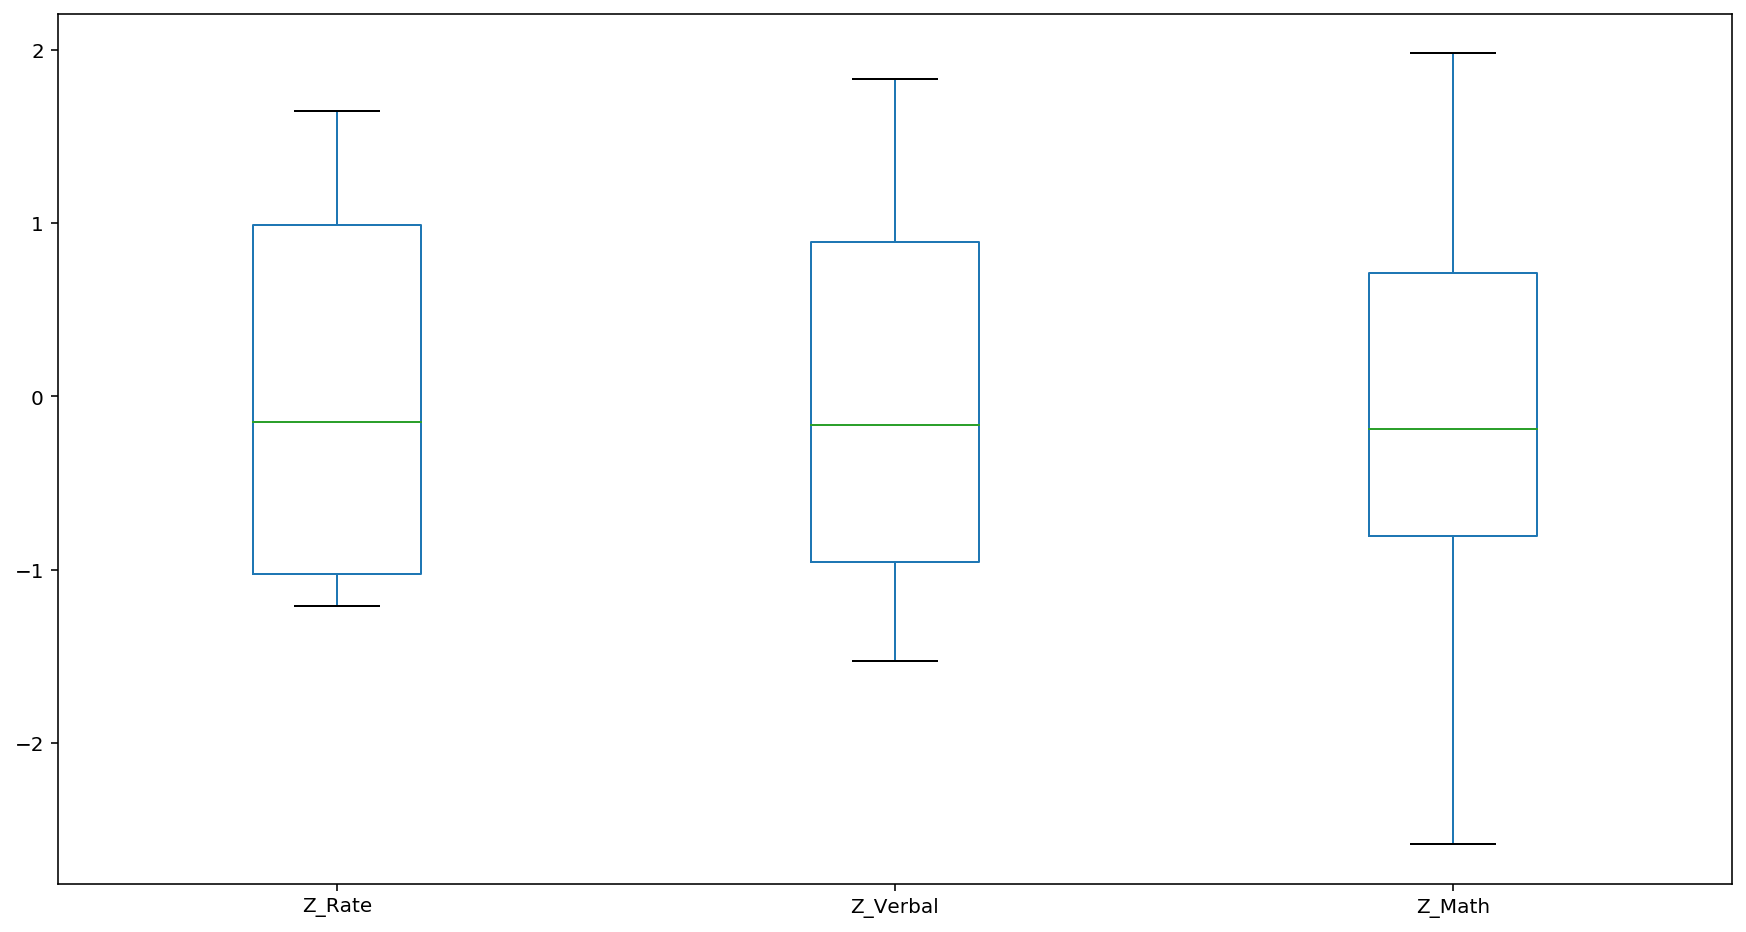

In [30]:
#Plots all variables on same boxplot using respective variable z-scores. 
#This facilitates direct comparisons as our variables now have a mean of 0 and a std of 1. 
cleaned_sat[['Z_Rate','Z_Verbal','Z_Math']].boxplot(figsize=(15,8), grid=False)

**ANSWER**: In this case, all variables have been converted to their respective z-scores, which standardises all scores to a mean of 0 and a standard deviation of 1. In this case, this makes direct comparisons between variables possible.

**EXTRA ANALYSIS** 

Below was something I was interested in. I have categorised the states by whether the SAT or ACT is a legal requirement for a particular state. The legality of test taking is likely to drive increase rates in their respective states. 

In [31]:
#Create a new dictionary based on legal requirements to undertake SAT or ACT by state.
#Note DC also include as SAT is legally required in this district. 
legal_requirement = {
    'SAT Legal Requirement': ["CO","CT","DC","DE","IL","ME","MI","NH"],
    'ACT Legal Requirement': ["AL","HI","ID","KY","LA","MS","MO","MT","NE","NV","NC","ND","OH","SC","TN","UT","WI","WY"],
    'Neither Legally Required': ["AK","AZ","AR","CA","FL","GA","IN",'IA',"KS","MD","MA","MN","NJ","NM",
                "NY","OK","OR","PA","RI","SD","TX","VT","VA","WA","WV"]
}

In [32]:
#Adds a new variable to data set that identifies legal requirements around SAT or ACT 
#by state from legal_requirement dictionary
for i in range(len(cleaned_sat)):
    for required in legal_requirement.keys():
        if cleaned_sat.loc[i,'State'] in (legal_requirement[required]):
            cleaned_sat.loc[i,'Legal Requirement'] = required

In [33]:
#Create a new dictionary based on legal requirements to undertake SAT or ACT by state.
#Note DC also include as SAT is legally required in this district. 
legal_flag = {
    '1': ["CO","CT","DC","DE","IL","ME","MI","NH"],
    '2': ["AL","HI","ID","KY","LA","MS","MO","MT","NE","NV","NC","ND","OH","SC","TN","UT","WI","WY"],
    '0': ["AK","AZ","AR","CA","FL","GA","IN",'IA',"KS","MD","MA","MN","NJ","NM",
                "NY","OK","OR","PA","RI","SD","TX","VT","VA","WA","WV"]
}

In [34]:
#Adds a new variable to data set for use in legal flag
#by state from legal_requirement dictionary
for i in range(len(cleaned_sat)):
    for required in legal_flag.keys():
        if cleaned_sat.loc[i,'State'] in (legal_flag[required]):
            cleaned_sat.loc[i,'Legal Flag'] = required

In [35]:
#Check that Legal requirement variable correctly added
cleaned_sat.head()

State  Rate  Verbal  Math    Z_Rate  Z_Verbal    Z_Math  \
0    CT    82     509   510  1.649606 -0.712322 -0.607938   
1    NJ    81     499   513  1.612948 -1.015059 -0.524442   
2    MA    79     511   515  1.539632 -0.651775 -0.468778   
3    NY    77     495   505  1.466317 -1.136154 -0.747098   
4    NH    72     520   516  1.283027 -0.379312 -0.440946   

          Legal Requirement Legal Flag  
0     SAT Legal Requirement          1  
1  Neither Legally Required          0  
2  Neither Legally Required          0  
3  Neither Legally Required          0  
4     SAT Legal Requirement          1

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F9B28ABC18>,
      dtype=object)

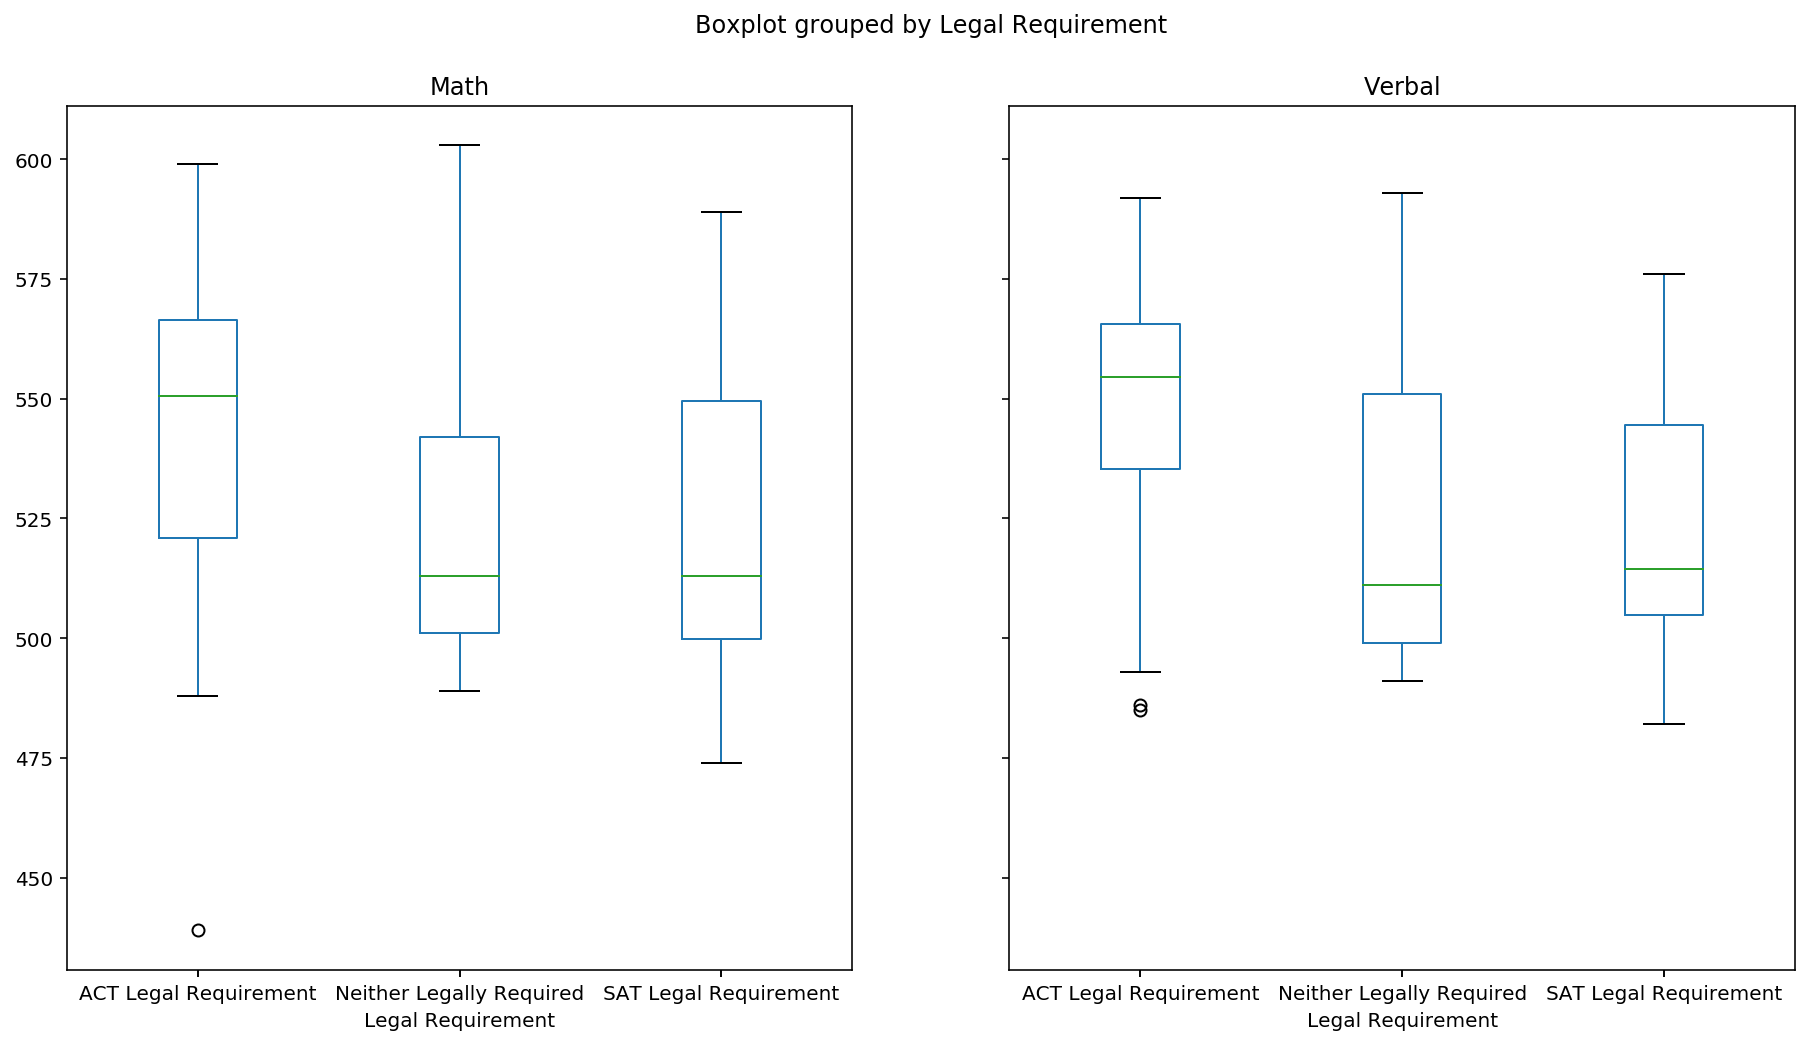

In [36]:
#Now trying out box plots by legal requirment group and SAT subsections
cleaned_sat.boxplot(column=['Math','Verbal'],by='Legal Requirement', figsize=(15,8), grid=False)

# cleaned_sat[['Math','Verbal']].boxplot(figsize=(15,8), grid=False)

**OBSERVATIONS**

* ACT legal requirement states have higher Math and Verbal rates. This is unexpected as would expect that states with a legal requirment to take the SAT would score higher. Possible reasons for this include:
  * ACT states are more aligned to SAT requirments possibly due to teaching practices or focuses
  * ACT states tend to have lower rates of SAT completion. Therefore, the limited amount of schools may be higher quality

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [37]:
#Verifying mean of Verbal scores working for use in masking frame
verbal_mean = round(cleaned_sat['Verbal'].mean(),ndigits=2)
verbal_mean

532.53

In [38]:
#Returns masked frame where verbal is greater than average of Verbal SAT Scores
cleaned_sat[cleaned_sat.Verbal > cleaned_sat['Verbal'].mean()]

State  Rate  Verbal  Math    Z_Rate  Z_Verbal    Z_Math  \
26    CO    31     539   542 -0.219947  0.195889  0.282686   
27    OH    26     534   439 -0.403237  0.044520 -2.584010   
28    MT    23     539   539 -0.513211  0.195889  0.199190   
30    ID    17     543   542 -0.733158  0.316983  0.282686   
31    TN    13     562   553 -0.879790  0.892183  0.588838   
32    NM    13     551   542 -0.879790  0.559173  0.282686   
33    IL    12     576   589 -0.916448  1.316015  1.590789   
34    KY    12     550   550 -0.916448  0.528899  0.505342   
35    WY    11     547   545 -0.953106  0.438078  0.366182   
36    MI    11     561   572 -0.953106  0.861910  1.117646   
37    MN     9     580   589 -1.026422  1.437110  1.590789   
38    KS     9     577   580 -1.026422  1.346289  1.340301   
39    AL     9     559   554 -1.026422  0.801362  0.616670   
40    NE     8     562   568 -1.063080  0.892183  1.006318   
41    OK     8     567   561 -1.063080  1.043552  0.811494   
42    MO     8     577   577 -1.063080  1.346289  1.256806   
43    LA     7     564   562 -1.099737  0.952731  0.839326   
44    WI     6     584   596 -1.136395  1.558205  1.785613   
45    AR     6     562   550 -1.136395  0.892183  0.505342   
46    UT     5     575   570 -1.173053  1.285741  1.061982   
47    IA     5     593   603 -1.173053  1.830668  1.980437   
48    SD     4     577   582 -1.209711  1.346289  1.395965   
49    ND     4     592   599 -1.209711  1.800394  1.869109   
50    MS     4     566   551 -1.209711  1.013278  0.533174   

           Legal Requirement Legal Flag  
26     SAT Legal Requirement          1  
27     ACT Legal Requirement          2  
28     ACT Legal Requirement          2  
30     ACT Legal Requirement          2  
31     ACT Legal Requirement          2  
32  Neither Legally Required          0  
33     SAT Legal Requirement          1  
34     ACT Legal Requirement          2  
35     ACT Legal Requirement          2  
36     SAT Legal Requirement          1  
37  Neither Legally Required          0  
38  Neither Legally Required          0  
39     ACT Legal Requirement          2  
40     ACT Legal Requirement          2  
41  Neither Legally Required          0  
42     ACT Legal Requirement          2  
43     ACT Legal Requirement          2  
44     ACT Legal Requirement          2  
45  Neither Legally Required          0  
46     ACT Legal Requirement          2  
47  Neither Legally Required          0  
48  Neither Legally Required          0  
49     ACT Legal Requirement          2  
50     ACT Legal Requirement          2

In [39]:
#Prints out median of states on verbal and the list of states above the mean
high_state_verbal = cleaned_sat[cleaned_sat.Verbal > cleaned_sat['Verbal'].mean()]
high_state_verbal = high_state_verbal['State'].tolist()
print("There are", len(high_state_verbal), "states above the mean of verbal SAT scores (", verbal_mean, "). These states are are", high_state_verbal)

There are 24 states above the mean of verbal SAT scores ( 532.53 ). These states are are ['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


**Answer**: There are 24 states above the average(mean) of Verbal SAT score. It suggests that the distribution of verbal SAT scores is approximately normal as there is approximatly the same amount of states above and below the mean. 

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [40]:
verbal_median = cleaned_sat['Verbal'].median()
verbal_median

527.0

In [41]:
#Returns masked frame where verbal is greater than average of Verbal SAT Scores and then converts to list 
#and prints out this list along with the mean of the verbal scores
high_median_state_verbal = cleaned_sat[cleaned_sat.Verbal > cleaned_sat['Verbal'].median()]
high_median_state_verbal = high_median_state_verbal['State'].tolist()
print("There are", len(high_median_state_verbal), 
      "states above the mean of verbal SAT scores (", 
      verbal_median, "). These states are are", high_median_state_verbal)

There are 24 states above the mean of verbal SAT scores ( 527.0 ). These states are are ['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


In [42]:
high_state_verbal.sort()
high_median_state_verbal.sort()
if high_state_verbal == high_median_state_verbal:
    print("The two lists are identical")
else:
    print("The two lists are NOT identical")

The two lists are identical


**ANSWER**: The list of states is the same for the two lists of states above the mean and median on Verbal SAT scores. This is because the mean and median are similar and thus split the states at roughly the same point. 

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [43]:
#Create variable called Domain_difference based on difference between verbal and math scores. 
cleaned_sat['Domain_Difference'] = cleaned_sat['Verbal'] - cleaned_sat['Math']
cleaned_sat.head()

State  Rate  Verbal  Math    Z_Rate  Z_Verbal    Z_Math  \
0    CT    82     509   510  1.649606 -0.712322 -0.607938   
1    NJ    81     499   513  1.612948 -1.015059 -0.524442   
2    MA    79     511   515  1.539632 -0.651775 -0.468778   
3    NY    77     495   505  1.466317 -1.136154 -0.747098   
4    NH    72     520   516  1.283027 -0.379312 -0.440946   

          Legal Requirement Legal Flag  Domain_Difference  
0     SAT Legal Requirement          1                 -1  
1  Neither Legally Required          0                -14  
2  Neither Legally Required          0                 -4  
3  Neither Legally Required          0                -10  
4     SAT Legal Requirement          1                  4

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [44]:
#Creates data frame of the 10 states with the greatest gap between Verbal and Math where verabl is greater than math
difference_df1 = cleaned_sat.sort_values(by=['Domain_Difference']).tail(10)
difference_df1 = difference_df1.sort_values(by=['Domain_Difference'], ascending=False)
difference_df1 = difference_df1.reset_index(drop=True)
difference_df1

State  Rate  Verbal  Math    Z_Rate  Z_Verbal    Z_Math  \
0    OH    26     534   439 -0.403237  0.044520 -2.584010   
1    WV    18     527   512 -0.696500 -0.167396 -0.552274   
2    MS     4     566   551 -1.209711  1.013278  0.533174   
3    AR     6     562   550 -1.136395  0.892183  0.505342   
4    NM    13     551   542 -0.879790  0.559173  0.282686   
5    VA    68     510   501  1.136395 -0.682048 -0.858426   
6    TN    13     562   553 -0.879790  0.892183  0.588838   
7    DC    56     482   474  0.696500 -1.529712 -1.609890   
8    ME    69     506   500  1.173053 -0.803143 -0.886258   
9    OK     8     567   561 -1.063080  1.043552  0.811494   

          Legal Requirement Legal Flag  Domain_Difference  
0     ACT Legal Requirement          2                 95  
1  Neither Legally Required          0                 15  
2     ACT Legal Requirement          2                 15  
3  Neither Legally Required          0                 12  
4  Neither Legally Required          0                  9  
5  Neither Legally Required          0                  9  
6     ACT Legal Requirement          2                  9  
7     SAT Legal Requirement          1                  8  
8     SAT Legal Requirement          1                  6  
9  Neither Legally Required          0                  6

In [45]:
#Creates data frame of the 10 states with the greatest gap between Verbal and Math where Math is greater than Verbal
difference_df2 = cleaned_sat.sort_values(by=['Domain_Difference']).head(10)
difference_df2 = difference_df2.reset_index(drop=True)
difference_df2

State  Rate  Verbal  Math    Z_Rate  Z_Verbal    Z_Math  \
0    HI    52     485   515  0.549869 -1.438891 -0.468778   
1    CA    51     498   517  0.513211 -1.045333 -0.413114   
2    NJ    81     499   513  1.612948 -1.015059 -0.524442   
3    IL    12     576   589 -0.916448  1.316015  1.590789   
4    WI     6     584   596 -1.136395  1.558205  1.785613   
5    MI    11     561   572 -0.953106  0.861910  1.117646   
6    NY    77     495   505  1.466317 -1.136154 -0.747098   
7    IA     5     593   603 -1.173053  1.830668  1.980437   
8    MN     9     580   589 -1.026422  1.437110  1.590789   
9    ND     4     592   599 -1.209711  1.800394  1.869109   

          Legal Requirement Legal Flag  Domain_Difference  
0     ACT Legal Requirement          2                -30  
1  Neither Legally Required          0                -19  
2  Neither Legally Required          0                -14  
3     SAT Legal Requirement          1                -13  
4     ACT Legal Requirement          2                -12  
5     SAT Legal Requirement          1                -11  
6  Neither Legally Required          0                -10  
7  Neither Legally Required          0                -10  
8  Neither Legally Required          0                 -9  
9     ACT Legal Requirement          2                 -7

In [46]:
# Prints out top 3 states where Verbal is greater than Math
print(difference_df1.head(3))

  State  Rate  Verbal  Math    Z_Rate  Z_Verbal    Z_Math  \
0    OH    26     534   439 -0.403237  0.044520 -2.584010   
1    WV    18     527   512 -0.696500 -0.167396 -0.552274   
2    MS     4     566   551 -1.209711  1.013278  0.533174   

          Legal Requirement Legal Flag  Domain_Difference  
0     ACT Legal Requirement          2                 95  
1  Neither Legally Required          0                 15  
2     ACT Legal Requirement          2                 15  


In [47]:
# Prints out top 3 states where Math is greater than Verbal
print(difference_df2.head(3))

  State  Rate  Verbal  Math    Z_Rate  Z_Verbal    Z_Math  \
0    HI    52     485   515  0.549869 -1.438891 -0.468778   
1    CA    51     498   517  0.513211 -1.045333 -0.413114   
2    NJ    81     499   513  1.612948 -1.015059 -0.524442   

          Legal Requirement Legal Flag  Domain_Difference  
0     ACT Legal Requirement          2                -30  
1  Neither Legally Required          0                -19  
2  Neither Legally Required          0                -14  


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [48]:
#Outputs the pearsons correlation matrix with results rounded to 2dp.
cleaned_sat.corr().round(decimals=2)

Rate  Verbal  Math  Z_Rate  Z_Verbal  Z_Math  \
Rate               1.00   -0.89 -0.77    1.00     -0.89   -0.77   
Verbal            -0.89    1.00  0.90   -0.89      1.00    0.90   
Math              -0.77    0.90  1.00   -0.77      0.90    1.00   
Z_Rate             1.00   -0.89 -0.77    1.00     -0.89   -0.77   
Z_Verbal          -0.89    1.00  0.90   -0.89      1.00    0.90   
Z_Math            -0.77    0.90  1.00   -0.77      0.90    1.00   
Domain_Difference -0.10    0.04 -0.40   -0.10      0.04   -0.40   

                   Domain_Difference  
Rate                           -0.10  
Verbal                          0.04  
Math                           -0.40  
Z_Rate                         -0.10  
Z_Verbal                        0.04  
Z_Math                         -0.40  
Domain_Difference               1.00

**ANSWER**: According to Cohen (1988), in Psychological research (of which the current variables could be considered to be classified given their nature) an absolute value of r of 0.5 or larger is classified as large, 0.3 to <0.5 medium, and 0.1 to <0.3 small. Thus, the inter-correlations matrix shows:
* **Strong** negative linear relationship between Verbal and Rate (-.89)
* **Strong** negative linear relationship between Math and Rate (-.77)
* **Strong** positive linear relationship between Verbal and Math (.90)



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [49]:
#Checking if any of the columns contain null values
cleaned_sat.isnull().sum()

State                0
Rate                 0
Verbal               0
Math                 0
Z_Rate               0
Z_Verbal             0
Z_Math               0
Legal Requirement    0
Legal Flag           0
Domain_Difference    0
dtype: int64

In [50]:
#Using the describe function, provides descriptive statistics of each of the variables. 
cleaned_sat.describe().round(decimals=2)

Rate  Verbal    Math  Z_Rate  Z_Verbal  Z_Math  Domain_Difference
count  51.00   51.00   51.00   51.00     51.00   51.00              51.00
mean   37.00  532.53  531.84    0.00      0.00   -0.00               0.69
std    27.55   33.36   36.29    1.01      1.01    1.01              15.84
min     4.00  482.00  439.00   -1.21     -1.53   -2.58             -30.00
25%     9.00  501.00  503.00   -1.03     -0.95   -0.80              -6.00
50%    33.00  527.00  525.00   -0.15     -0.17   -0.19               0.00
75%    64.00  562.00  557.50    0.99      0.89    0.71               4.50
max    82.00  593.00  603.00    1.65      1.83    1.98              95.00

**ANSWER**
* **count**: Provides a count number of non-NA/null data points in the respective column of the dataframe
* **mean**: Provides the mean of the data points in the respective column of the dataframe
* **std**: Provides the standard deviation of the data points in the respective column of the dataframe
* **min**: Provides the smallest value of the data points in the respective column of the dataframe
* **25%**: Provides the value associated with the 25th percentile of the data points in the respective column of the dataframe
* **50%**: Provides the value associated with the 50th percentile (also the median) of the data points in the respective column of the dataframe
* **75%**: Provides the value associated with the 75th percentile of the data points in the respective column of the dataframe
* **max**: Provides the largest value of the data points in the respective column of the dataframe

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [51]:
#Assigns covariance matrix to a new variable called covariance_matrix and prints this to screen.
covariance_matrix = cleaned_sat.cov().round(decimals=2)
print(covariance_matrix)

                     Rate   Verbal     Math  Z_Rate  Z_Verbal  Z_Math  \
Rate               759.04  -816.28  -773.22   27.82    -24.71  -21.52   
Verbal            -816.28  1112.93  1089.40  -29.92     33.69   30.32   
Math              -773.22  1089.40  1316.77  -28.34     32.98   36.65   
Z_Rate              27.82   -29.92   -28.34    1.02     -0.91   -0.79   
Z_Verbal           -24.71    33.69    32.98   -0.91      1.02    0.92   
Z_Math             -21.52    30.32    36.65   -0.79      0.92    1.02   
Domain_Difference  -43.06    23.53  -227.37   -1.58      0.71   -6.33   

                   Domain_Difference  
Rate                          -43.06  
Verbal                         23.53  
Math                         -227.37  
Z_Rate                         -1.58  
Z_Verbal                        0.71  
Z_Math                         -6.33  
Domain_Difference             250.90  


**ANSWER**: The covariance matrix is similar to the correlation matrix in that they indicate the relationship between the two variables. Where they differ is in terms of the unit of measurment. Specifically, the covariance matrix uses unstandardised units of relationship and thus are not directly comparable to each other in terms of their strength but will indicate direction of the relationship. In constrast the correlation matrix uses a standardised unit of the relationship (ranging from - 1 to +1) and thus can be directly compared to each other to indicate strength of the relationship also. 

In [52]:
#This is just a little extra to help visualise rate of SAT completion across US states.
import plotly.graph_objects as go

dftest = cleaned_sat



fig = go.Figure(data=go.Choropleth(
    locations=dftest['State'],
    z=dftest['Rate'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=dftest['Rate'], # hover text
    marker_line_color='black', # line markers between states
    colorbar_title="% Rate of SAT Completion"
))

fig.update_layout(
    title_text='SAT Rates by State',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

In [53]:
cleaned_sat

State  Rate  Verbal  Math    Z_Rate  Z_Verbal    Z_Math  \
0     CT    82     509   510  1.649606 -0.712322 -0.607938   
1     NJ    81     499   513  1.612948 -1.015059 -0.524442   
2     MA    79     511   515  1.539632 -0.651775 -0.468778   
3     NY    77     495   505  1.466317 -1.136154 -0.747098   
4     NH    72     520   516  1.283027 -0.379312 -0.440946   
5     RI    71     501   499  1.246369 -0.954512 -0.914090   
6     PA    71     500   499  1.246369 -0.984785 -0.914090   
7     VT    69     511   506  1.173053 -0.651775 -0.719266   
8     ME    69     506   500  1.173053 -0.803143 -0.886258   
9     VA    68     510   501  1.136395 -0.682048 -0.858426   
10    DE    67     501   499  1.099737 -0.954512 -0.914090   
11    MD    65     508   510  1.026422 -0.742596 -0.607938   
12    NC    65     493   499  1.026422 -1.196701 -0.914090   
13    GA    63     491   489  0.953106 -1.257249 -1.192410   
14    IN    60     499   501  0.843132 -1.015059 -0.858426   
15    SC    57     486   488  0.733158 -1.408617 -1.220242   
16    DC    56     482   474  0.696500 -1.529712 -1.609890   
17    OR    55     526   526  0.659842 -0.197669 -0.162626   
18    FL    54     498   499  0.623185 -1.045333 -0.914090   
19    WA    53     527   527  0.586527 -0.167396 -0.134794   
20    TX    53     493   499  0.586527 -1.196701 -0.914090   
21    HI    52     485   515  0.549869 -1.438891 -0.468778   
22    AK    51     514   510  0.513211 -0.560954 -0.607938   
23    CA    51     498   517  0.513211 -1.045333 -0.413114   
24    AZ    34     523   525 -0.109974 -0.288490 -0.190458   
25    NV    33     509   515 -0.146632 -0.712322 -0.468778   
26    CO    31     539   542 -0.219947  0.195889  0.282686   
27    OH    26     534   439 -0.403237  0.044520 -2.584010   
28    MT    23     539   539 -0.513211  0.195889  0.199190   
29    WV    18     527   512 -0.696500 -0.167396 -0.552274   
30    ID    17     543   542 -0.733158  0.316983  0.282686   
31    TN    13     562   553 -0.879790  0.892183  0.588838   
32    NM    13     551   542 -0.879790  0.559173  0.282686   
33    IL    12     576   589 -0.916448  1.316015  1.590789   
34    KY    12     550   550 -0.916448  0.528899  0.505342   
35    WY    11     547   545 -0.953106  0.438078  0.366182   
36    MI    11     561   572 -0.953106  0.861910  1.117646   
37    MN     9     580   589 -1.026422  1.437110  1.590789   
38    KS     9     577   580 -1.026422  1.346289  1.340301   
39    AL     9     559   554 -1.026422  0.801362  0.616670   
40    NE     8     562   568 -1.063080  0.892183  1.006318   
41    OK     8     567   561 -1.063080  1.043552  0.811494   
42    MO     8     577   577 -1.063080  1.346289  1.256806   
43    LA     7     564   562 -1.099737  0.952731  0.839326   
44    WI     6     584   596 -1.136395  1.558205  1.785613   
45    AR     6     562   550 -1.136395  0.892183  0.505342   
46    UT     5     575   570 -1.173053  1.285741  1.061982   
47    IA     5     593   603 -1.173053  1.830668  1.980437   
48    SD     4     577   582 -1.209711  1.346289  1.395965   
49    ND     4     592   599 -1.209711  1.800394  1.869109   
50    MS     4     566   551 -1.209711  1.013278  0.533174   

           Legal Requirement Legal Flag  Domain_Difference  
0      SAT Legal Requirement          1                 -1  
1   Neither Legally Required          0                -14  
2   Neither Legally Required          0                 -4  
3   Neither Legally Required          0                -10  
4      SAT Legal Requirement          1                  4  
5   Neither Legally Required          0                  2  
6   Neither Legally Required          0                  1  
7   Neither Legally Required          0                  5  
8      SAT Legal Requirement          1                  6  
9   Neither Legally Required          0                  9  
10     SAT Legal Requirement          1                  2  
11  Neither Legally Required          0       

In [54]:
#This is just a little extra to help visualise rate of SAT completion across US states.
import plotly.graph_objects as go

dftest = cleaned_sat



fig = go.Figure(data=go.Choropleth(
    locations=cleaned_sat['State'],
    z=cleaned_sat['Legal Flag'].astype(int),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=cleaned_sat['Legal Flag'], # hover text
    marker_line_color='black', # line markers between states
    colorbar_title="SAT/ACT Legal Requirement"
))

fig.update_layout(
    title_text='SAT/ACT Legal Requirement',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

In [55]:
legal_req = cleaned_sat.groupby(by='Legal Requirement')

In [56]:
groups = legal_req['Rate'].agg(np.mean)

In [57]:
groups

Legal Requirement
ACT Legal Requirement       20.00
Neither Legally Required    45.08
SAT Legal Requirement       50.00
Name: Rate, dtype: float64

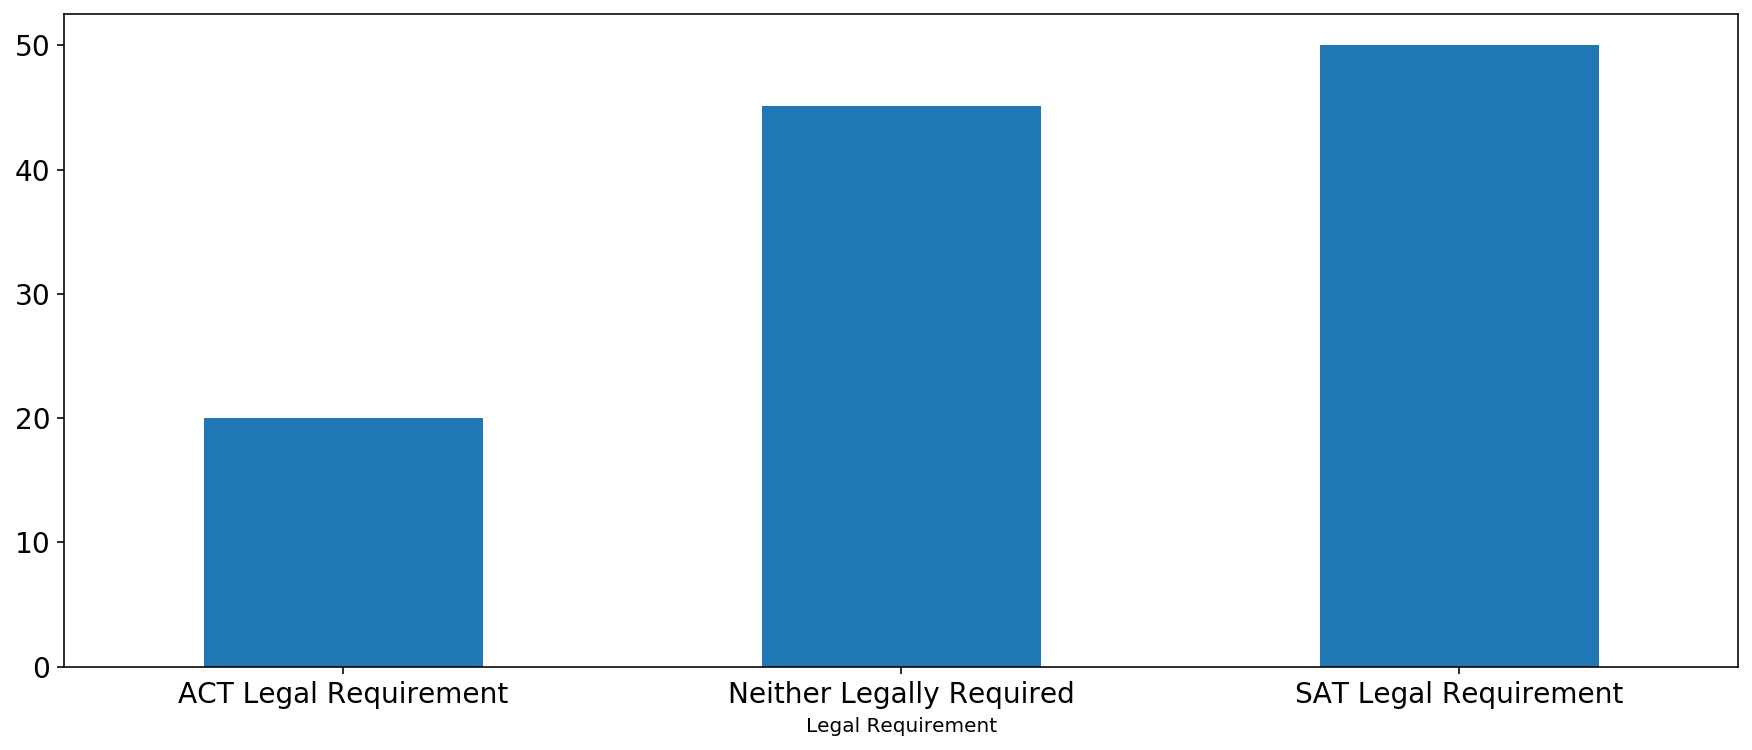

In [58]:
groups.plot(kind='bar', figsize=(15,6), rot=0, fontsize=14)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [59]:
#Create file name pathway and assign to variable
drug_file = "drug-use-by-age.csv"

In [60]:
#Import file into pandas dataframe using the read_csv module. 
drug = pd.read_csv(drug_file)
drug.T

0     1     2     3     4     5     6      7  \
age                        12    13    14    15    16    17    18     19   
n                        2798  2757  2792  2956  3058  3038  2469   2223   
alcohol-use               3.9   8.5  18.1  29.2  40.1  49.3  58.7   64.6   
alcohol-frequency           3     6     5     6    10    13    24     36   
marijuana-use             1.1   3.4   8.7  14.5  22.5    28  33.7   33.4   
marijuana-frequency         4    15    24    25    30    36    52     60   
cocaine-use               0.1   0.1   0.1   0.5     1     2   3.2    4.1   
cocaine-frequency         5.0   1.0   5.5   4.0   7.0   5.0   5.0    5.5   
crack-use                   0     0     0   0.1     0   0.1   0.4    0.5   
crack-frequency             -   3.0     -   9.5   1.0  21.0  10.0    2.0   
heroin-use                0.1     0   0.1   0.2   0.1   0.1   0.4    0.5   
heroin-frequency         35.5     -   2.0   1.0  66.5  64.0  46.0  180.0   
hallucinogen-use          0.2   0.6   1.6   2.1   3.4   4.8     7    8.6   
hallucinogen-frequency     52     6     3     4     3     3     4      3   
inhalant-use              1.6   2.5   2.6   2.5     3     2   1.8    1.4   
inhalant-frequency       19.0  12.0   5.0   5.5   3.0   4.0   4.0    3.0   
pain-releiver-use           2   2.4   3.9   5.5   6.2   8.5   9.2    9.4   
pain-releiver-frequency    36    14    12    10     7     9    12     12   
oxycontin-use             0.1   0.1   0.4   0.8   1.1   1.4   1.7    1.5   
oxycontin-frequency      24.5  41.0   4.5   3.0   4.0   6.0   7.0    7.5   
tranquilizer-use          0.2   0.3   0.9     2   2.4   3.5   4.9    4.2   
tranquilizer-frequency     52  25.5     5   4.5    11     7    12    4.5   
stimulant-use             0.2   0.3   0.8   1.5   1.8   2.8     3    3.3   
stimulant-frequency         2     4    12     6   9.5     9     8      6   
meth-use                    0   0.1   0.1   0.3   0.3   0.6   0.5    0.4   
meth-frequency              -   5.0  24.0  10.5  36.0  48.0  12.0  105.0   
sedative-use              0.2   0.1   0.2   0.4   0.2   0.5   0.4    0.3   
sedative-frequency         13    19  16.5    30     3   6.5    10      6   

                            8     9     10     11     12     13     14     15  \
age                        20    21  22-23  24-25  26-29  30-34  35-49  50-64   
n                        2271  2354   4707   4591   2628   2864   7391   3923   
alcohol-use              69.7  83.2   84.2   83.1   80.7   77.5     75   67.2   
alcohol-frequency          48    52     52     52     52     52     52     52   
marijuana-use              34    33   28.4   24.9   20.8   16.4   10.4    7.3   
marijuana-frequency        60    52     52     60     52     72     48     52   
cocaine-use               4.9   4.8    4.5      4    3.2    2.1    1.5    0.9   
cocaine-frequency         8.0   5.0    5.0    6.0    5.0    8.0   15.0   36.0   
crack-use                 0.6   0.5    0.5    0.5    0.4    0.5    0.5    0.4   
crack-frequency           5.0  17.0    5.0    6.0    6.0   15.0   48.0   62.0   
heroin-use                0.9   0.6    1.1    0.7    0.6    0.4    0.1    0.1   
heroin-frequency         45.0  30.0   57.5   88.0   50.0   66.0  280.0   41.0   
hallucinogen-use          7.4   6.3    5.2    4.5    3.2    1.8    0.6    0.3   
hallucinogen-frequency      2     4      3      2      3      2      3     44   
inhalant-use              1.5   1.4      1    0.8    0.6    0.4    0.3    0.2   
inhalant-frequency        4.0   2.0    4.0    2.0    4.0    3.5   10.0   13.5   
pain-releiver-use          10     9     10      9    8.3    5.9    4.2    2.5   
pain-releiver-frequency    10    15     15     15     13     22     12     12   
oxycontin-use             1.7   1.3    1.7    1.3    1.2    0.9    0.3    0.4   
oxycontin-frequency      12.0  13.5   17.5   20.0   13.5   46.0   12.0    5.0   
tranquilizer-use          5.4   3.9    4.4    4.3    4.2    3.6    1.9    1.4   
tranquilizer-frequency     10     7     1

In [61]:
#Chekcing data types and null vaLues for cleaning. 
print(drug.dtypes)
print(drug.isnull().sum())

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object
age   

In [62]:
#Return only those columns where data type is an object for ease of checking if need to be converted
object_list = []
for key in dict(drug.dtypes):
    if dict(drug.dtypes)[key] in ['object']:
        object_list.append(key)
object_list

['age',
 'cocaine-frequency',
 'crack-frequency',
 'heroin-frequency',
 'inhalant-frequency',
 'oxycontin-frequency',
 'meth-frequency']

In [63]:
#Creates a list of all variables that are objects and lists the unique values for checking iwhich may be causing
#problems for preventing read in as float by pandas
counter == 0
for i in object_list:
    print(drug[i].name, drug[i].unique())
    
#Output shows that '-' is the item causing pandas to read objects as objects. Thus, will look to update to Null values. 

age ['12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '22-23' '24-25' '26-29'
 '30-34' '35-49' '50-64' '65+']
cocaine-frequency ['5.0' '1.0' '5.5' '4.0' '7.0' '8.0' '6.0' '15.0' '36.0' '-']
crack-frequency ['-' '3.0' '9.5' '1.0' '21.0' '10.0' '2.0' '5.0' '17.0' '6.0' '15.0'
 '48.0' '62.0']
heroin-frequency ['35.5' '-' '2.0' '1.0' '66.5' '64.0' '46.0' '180.0' '45.0' '30.0' '57.5'
 '88.0' '50.0' '66.0' '280.0' '41.0' '120.0']
inhalant-frequency ['19.0' '12.0' '5.0' '5.5' '3.0' '4.0' '2.0' '3.5' '10.0' '13.5' '-']
oxycontin-frequency ['24.5' '41.0' '4.5' '3.0' '4.0' '6.0' '7.0' '7.5' '12.0' '13.5' '17.5'
 '20.0' '46.0' '5.0' '-']
meth-frequency ['-' '5.0' '24.0' '10.5' '36.0' '48.0' '12.0' '105.0' '2.0' '46.0' '21.0'
 '30.0' '54.0' '104.0']


In [64]:
#Creates a new dataframe that replaces all - values in the 'drug' dataframe with Null values
drug_cleaned = drug.replace(to_replace ="-", 
                 value = np.nan) 

In [65]:
#Function to help with conversion of objects to floats
def converter_helper(value):
    try:
        return float(value)
    except:
        return value

def convert_to_float(column):
    column = column.map(converter_helper)
    return column

In [66]:
#Converting all columns to floats where possible.
drug_cleaned = drug_cleaned.apply(convert_to_float)
print(drug_cleaned.dtypes)

age                         object
n                          float64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object


In [67]:
#Checking that null conversion completed properly
drug_cleaned.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          1
crack-use                  0
crack-frequency            3
heroin-use                 0
heroin-frequency           1
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         1
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        1
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             2
sedative-use               0
sedative-frequency         0
dtype: int64

**ANSWERS**: 
* **Does this data require cleaning?** Yes. The original data has '-' for indicating it appears missing data. Have updated these to NaN values using np.nan method. Have also updated the data types for the columns as several were objects due to the reading of '-' as a string. All columns except 'age' have now been converted to floats. 'Age' remains an object as technically an ordinal variable. 
* **Are variables missing?** There doesn't appear to be any missing variables. However, as noted above, there was missing data for certain age groups. These have been replaced with null values and the count of null values in each column is shown by the 'drug_cleaned.isnull().sum()' instruction.
* **How will this affect your approach to EDA on the data?**: as age is an ordinal variable, there is still an order to the variables (e.g. those in the 35-49 age bracket are older than those aged 12) but we do not know the size of the differences between categories (e.g. we don't know the average age in the 35-49 bracket. It could be anywhere between 35 to 49. Therefore, we need to use categories for our age variable.

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [68]:
#Create a new dictionary of age groups to reduce variables to investigate to a more managable size. 
age_brackets = {
    'Teenagers': [12,13,14, 15,16,17],
    'Young Adults': [18,19,20,21,'22-23','24-25','26-29','30-34'],
    'Middle Adults': ['35-49'],
    'Older Adults': ['50-64', '65+']
}

In [69]:
#Adds a new variable to data set creates age groups based on age_brackets dictionary
for i in range(len(drug_cleaned)):
    for bracket in age_brackets.keys():
        if drug_cleaned.loc[i,'age'] in (age_brackets[bracket]):
            drug_cleaned.loc[i,'age bracket'] = bracket
            
drug_cleaned

age       n  alcohol-use  alcohol-frequency  marijuana-use  \
0      12  2798.0          3.9                3.0            1.1   
1      13  2757.0          8.5                6.0            3.4   
2      14  2792.0         18.1                5.0            8.7   
3      15  2956.0         29.2                6.0           14.5   
4      16  3058.0         40.1               10.0           22.5   
5      17  3038.0         49.3               13.0           28.0   
6      18  2469.0         58.7               24.0           33.7   
7      19  2223.0         64.6               36.0           33.4   
8      20  2271.0         69.7               48.0           34.0   
9      21  2354.0         83.2               52.0           33.0   
10  22-23  4707.0         84.2               52.0           28.4   
11  24-25  4591.0         83.1               52.0           24.9   
12  26-29  2628.0         80.7               52.0           20.8   
13  30-34  2864.0         77.5               52.0           16.4   
14  35-49  7391.0         75.0               52.0           10.4   
15  50-64  3923.0         67.2               52.0            7.3   
16    65+  2448.0         49.3               52.0            1.2   

    marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
0                   4.0          0.1                5.0        0.0   
1                  15.0          0.1                1.0        0.0   
2                  24.0          0.1                5.5        0.0   
3                  25.0          0.5                4.0        0.1   
4                  30.0          1.0                7.0        0.0   
5                  36.0          2.0                5.0        0.1   
6                  52.0          3.2                5.0        0.4   
7                  60.0          4.1                5.5        0.5   
8                  60.0          4.9                8.0        0.6   
9                  52.0          4.8                5.0        0.5   
10                 52.0          4.5                5.0        0.5   
11                 60.0          4.0                6.0        0.5   
12                 52.0          3.2                5.0        0.4   
13                 72.0          2.1                8.0        0.5   
14                 48.0          1.5               15.0        0.5   
15                 52.0          0.9               36.0        0.4   
16                 36.0          0.0                NaN        0.0   

    crack-frequency  ...  oxycontin-frequency  tranquilizer-use  \
0               NaN  ...                 24.5               0.2   
1               3.0  ...                 41.0               0.3   
2               NaN  ...                  4.5               0.9   
3               9.5  ...                  3.0               2.0   
4               1.0  ...                  4.0               2.4   
5              21.0  ...                  6.0               3.5   
6              10.0  ...                  7.0               4.9   
7               2.0  ...                  7.5               4.2   
8               5.0  ...                 12.0               5.4   
9              17.0  ...                 13.5               3.9   
10              5.0  ...                 17.5               4.4   
11              6.0  ...                 20.0               4.3   
12              6.0  ...                 13.5               4.2   
13             15.0  ...                 46.0               3.6   
14             48.0  ...                 12.0               1.9   
15             62.0  ...                  5.0               1.4   
16              NaN  ...                  NaN               0.2   

    tranquilizer-frequency  stimulant-use  stimulant-frequency  meth-use  \
0                     52.0            0.2                  2.0       0.0   
1                     25.5            0.3                  4.0       0.1   
2                      5.0            0.8                 12.0       0.1   
3        

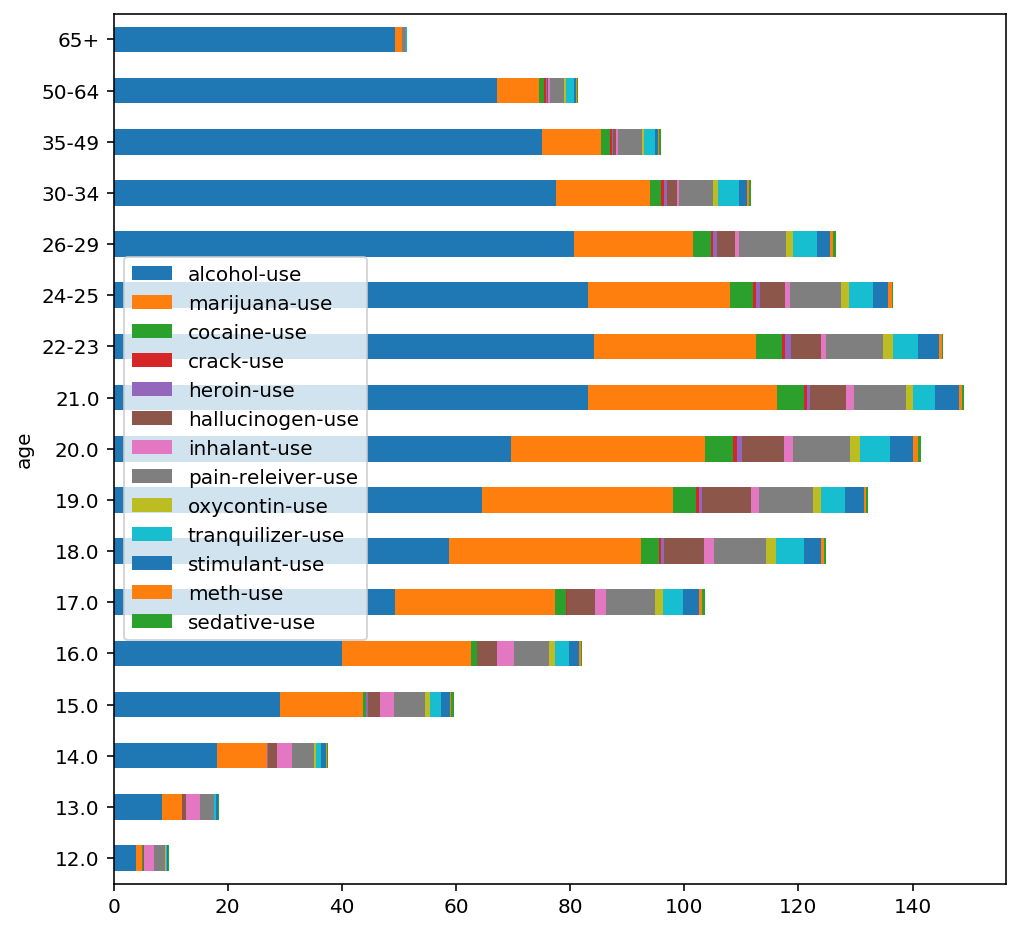

In [70]:
#Plots all drug use in a stacked horizontal plot to help visualise total drug use across different age groups
fig, axes = plt.subplots(figsize=(8,8))
drug_cleaned.plot(x='age',y=['alcohol-use',
              'marijuana-use',
              'cocaine-use',
              'crack-use',
              'heroin-use',
              'hallucinogen-use',
              'inhalant-use',
              'pain-releiver-use',
              'oxycontin-use',
              'tranquilizer-use',
              'stimulant-use',
              'meth-use',
              'sedative-use'], ax=axes, table=False, kind='barh', stacked=True)
                  
# drug_cleaned[['alcohol-use','marijuana-use']].plot(kind='bar')

#As can be seen, most drug use occuring at around 20-23 years of age. This is 
#not unexpected considering that the legal age for alcohol consumption in US is 21, 
#and is where young adults are usually experimenting is drugs (and left from childhood home 
#e.g. at university; moved out etc)

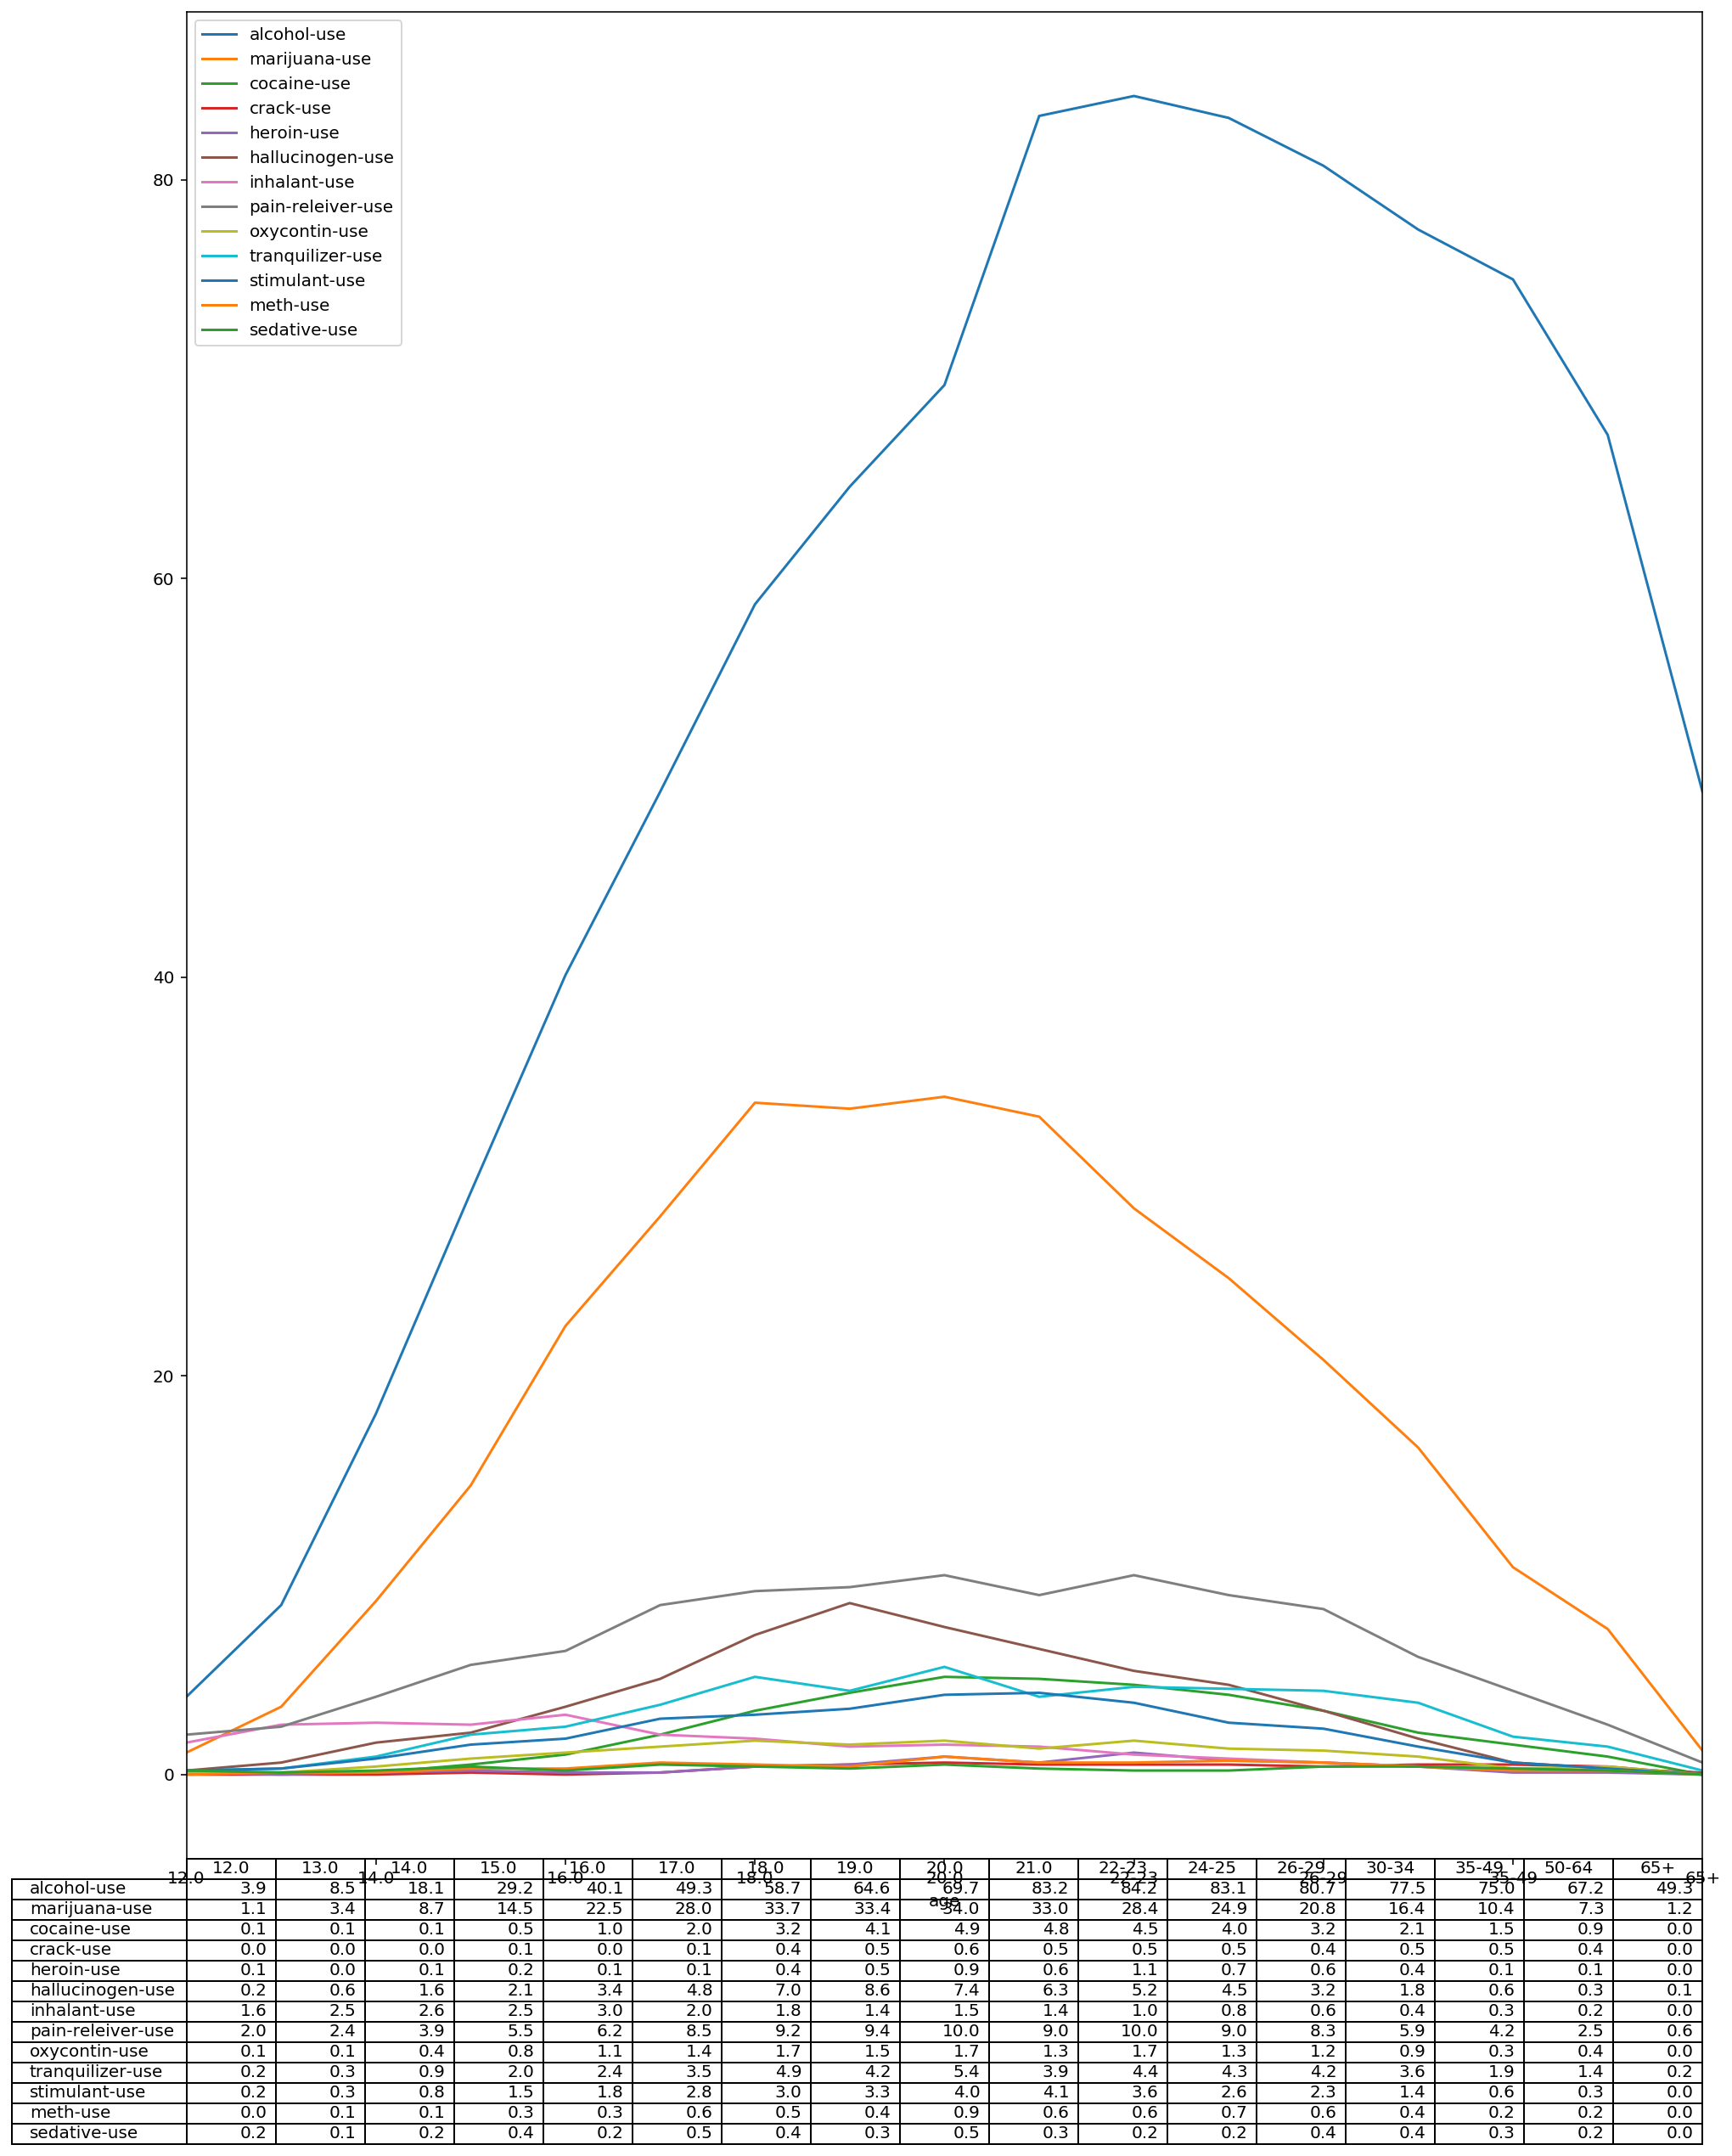

In [71]:
#Line plot to help visualise drug use by category
fig, axes = plt.subplots(figsize=(16,20))
drug_cleaned.plot(x='age',y=['alcohol-use',
              'marijuana-use',
              'cocaine-use',
              'crack-use',
              'heroin-use',
              'hallucinogen-use',
              'inhalant-use',
              'pain-releiver-use',
              'oxycontin-use',
              'tranquilizer-use',
              'stimulant-use',
              'meth-use',
              'sedative-use'], ax=axes, table=True, kind='line')
                  
# drug_cleaned[['alcohol-use','marijuana-use']].plot(kind='bar')
# Alcohol use clearly the highest percentage use, spiking at 22-23 years of age.
# This is followed by marijuna, although this spikes earlier at 18 years of age and remains releatively stable until 21.
# Suggests that marijuna transitions into alcohol use as move into legal age of consumption

In [72]:
#Investigate sample sizes across each age subgroup. Looking for small sample sizes.
drug_cleaned['n'].describe().round(decimals=0).T

count      17.0
mean     3251.0
std      1298.0
min      2223.0
25%      2469.0
50%      2798.0
75%      3058.0
max      7391.0
Name: n, dtype: float64

**Take away**:

* **Large sub-group sample sizes**: The smallest age subgroup sample size is 2223 and the largest is 7391 suggesting a large sample on which to base population inferences (i.e. increased confidence).

In [73]:
# Getting descriptive statistics of drug sample to look potential issues in the data 
# (e.g. impossible or confusing data points that may need removing or truncating)
drug_cleaned.describe().round(decimals=2).T

count     mean      std     min      25%      50%  \
n                         17.0  3251.06  1297.89  2223.0  2469.00  2798.00   
alcohol-use               17.0    55.43    26.88     3.9    40.10    64.60   
alcohol-frequency         17.0    33.35    21.32     3.0    10.00    48.00   
marijuana-use             17.0    18.92    11.96     1.1     8.70    20.80   
marijuana-frequency       17.0    42.94    18.36     4.0    30.00    52.00   
cocaine-use               17.0     2.18     1.82     0.0     0.50     2.00   
cocaine-frequency         16.0     7.88     8.04     1.0     5.00     5.25   
crack-use                 17.0     0.29     0.24     0.0     0.00     0.40   
crack-frequency           14.0    15.04    18.11     1.0     5.00     7.75   
heroin-use                17.0     0.35     0.33     0.0     0.10     0.20   
heroin-frequency          16.0    73.28    70.09     1.0    39.62    53.75   
hallucinogen-use          17.0     3.39     2.79     0.1     0.60     3.20   
hallucinogen-frequency    17.0     8.41    15.00     2.0     3.00     3.00   
inhalant-use              17.0     1.39     0.93     0.0     0.60     1.40   
inhalant-frequency        16.0     6.16     4.86     2.0     3.38     4.00   
pain-releiver-use         17.0     6.27     3.17     0.6     3.90     6.20   
pain-releiver-frequency   17.0    14.71     6.94     7.0    12.00    12.00   
oxycontin-use             17.0     0.94     0.61     0.0     0.40     1.10   
oxycontin-frequency       16.0    14.81    12.80     3.0     5.75    12.00   
tranquilizer-use          17.0     2.81     1.75     0.2     1.40     3.50   
tranquilizer-frequency    17.0    11.74    11.49     4.5     6.00    10.00   
stimulant-use             17.0     1.92     1.41     0.0     0.60     1.80   
stimulant-frequency       17.0    31.15    85.97     2.0     7.00    10.00   
meth-use                  17.0     0.38     0.26     0.0     0.20     0.40   
meth-frequency            15.0    35.97    31.97     2.0    12.00    30.00   
sedative-use              17.0     0.28     0.14     0.0     0.20     0.30   
sedative-frequency        17.0    19.38    24.83     3.0     6.50    10.00   

                             75%     max  
n                        3058.00  7391.0  
alcohol-use                77.50    84.2  
alcohol-frequency          52.00    52.0  
marijuana-use              28.40    34.0  
marijuana-frequency        52.00    72.0  
cocaine-use                 4.00     4.9  
cocaine-frequency           7.25    36.0  
crack-use                   0.50     0.6  
crack-frequency            16.50    62.0  
heroin-use                  0.60     1.1  
heroin-frequency           71.88   280.0  
hallucinogen-use            5.20     8.6  
hallucinogen-frequency      4.00    52.0  
inhalant-use                2.00     3.0  
inhalant-frequency          6.62    19.0  
pain-releiver-use           9.00    10.0  
pain-releiver-frequency    15.00    36.0  
oxycontin-use               1.40     1.7  
oxycontin-frequency        18.12    46.0  
tranquilizer-use            4.20     5.4  
tranquilizer-frequency     11.00    52.0  
stimulant-use               3.00     4.1  
stimulant-frequency        12.00   364.0  
meth-use                    0.60     0.9  
meth-frequency             47.00   105.0  
sedative-use                0.40     0.5  
sedative-frequency         17.50   104.0

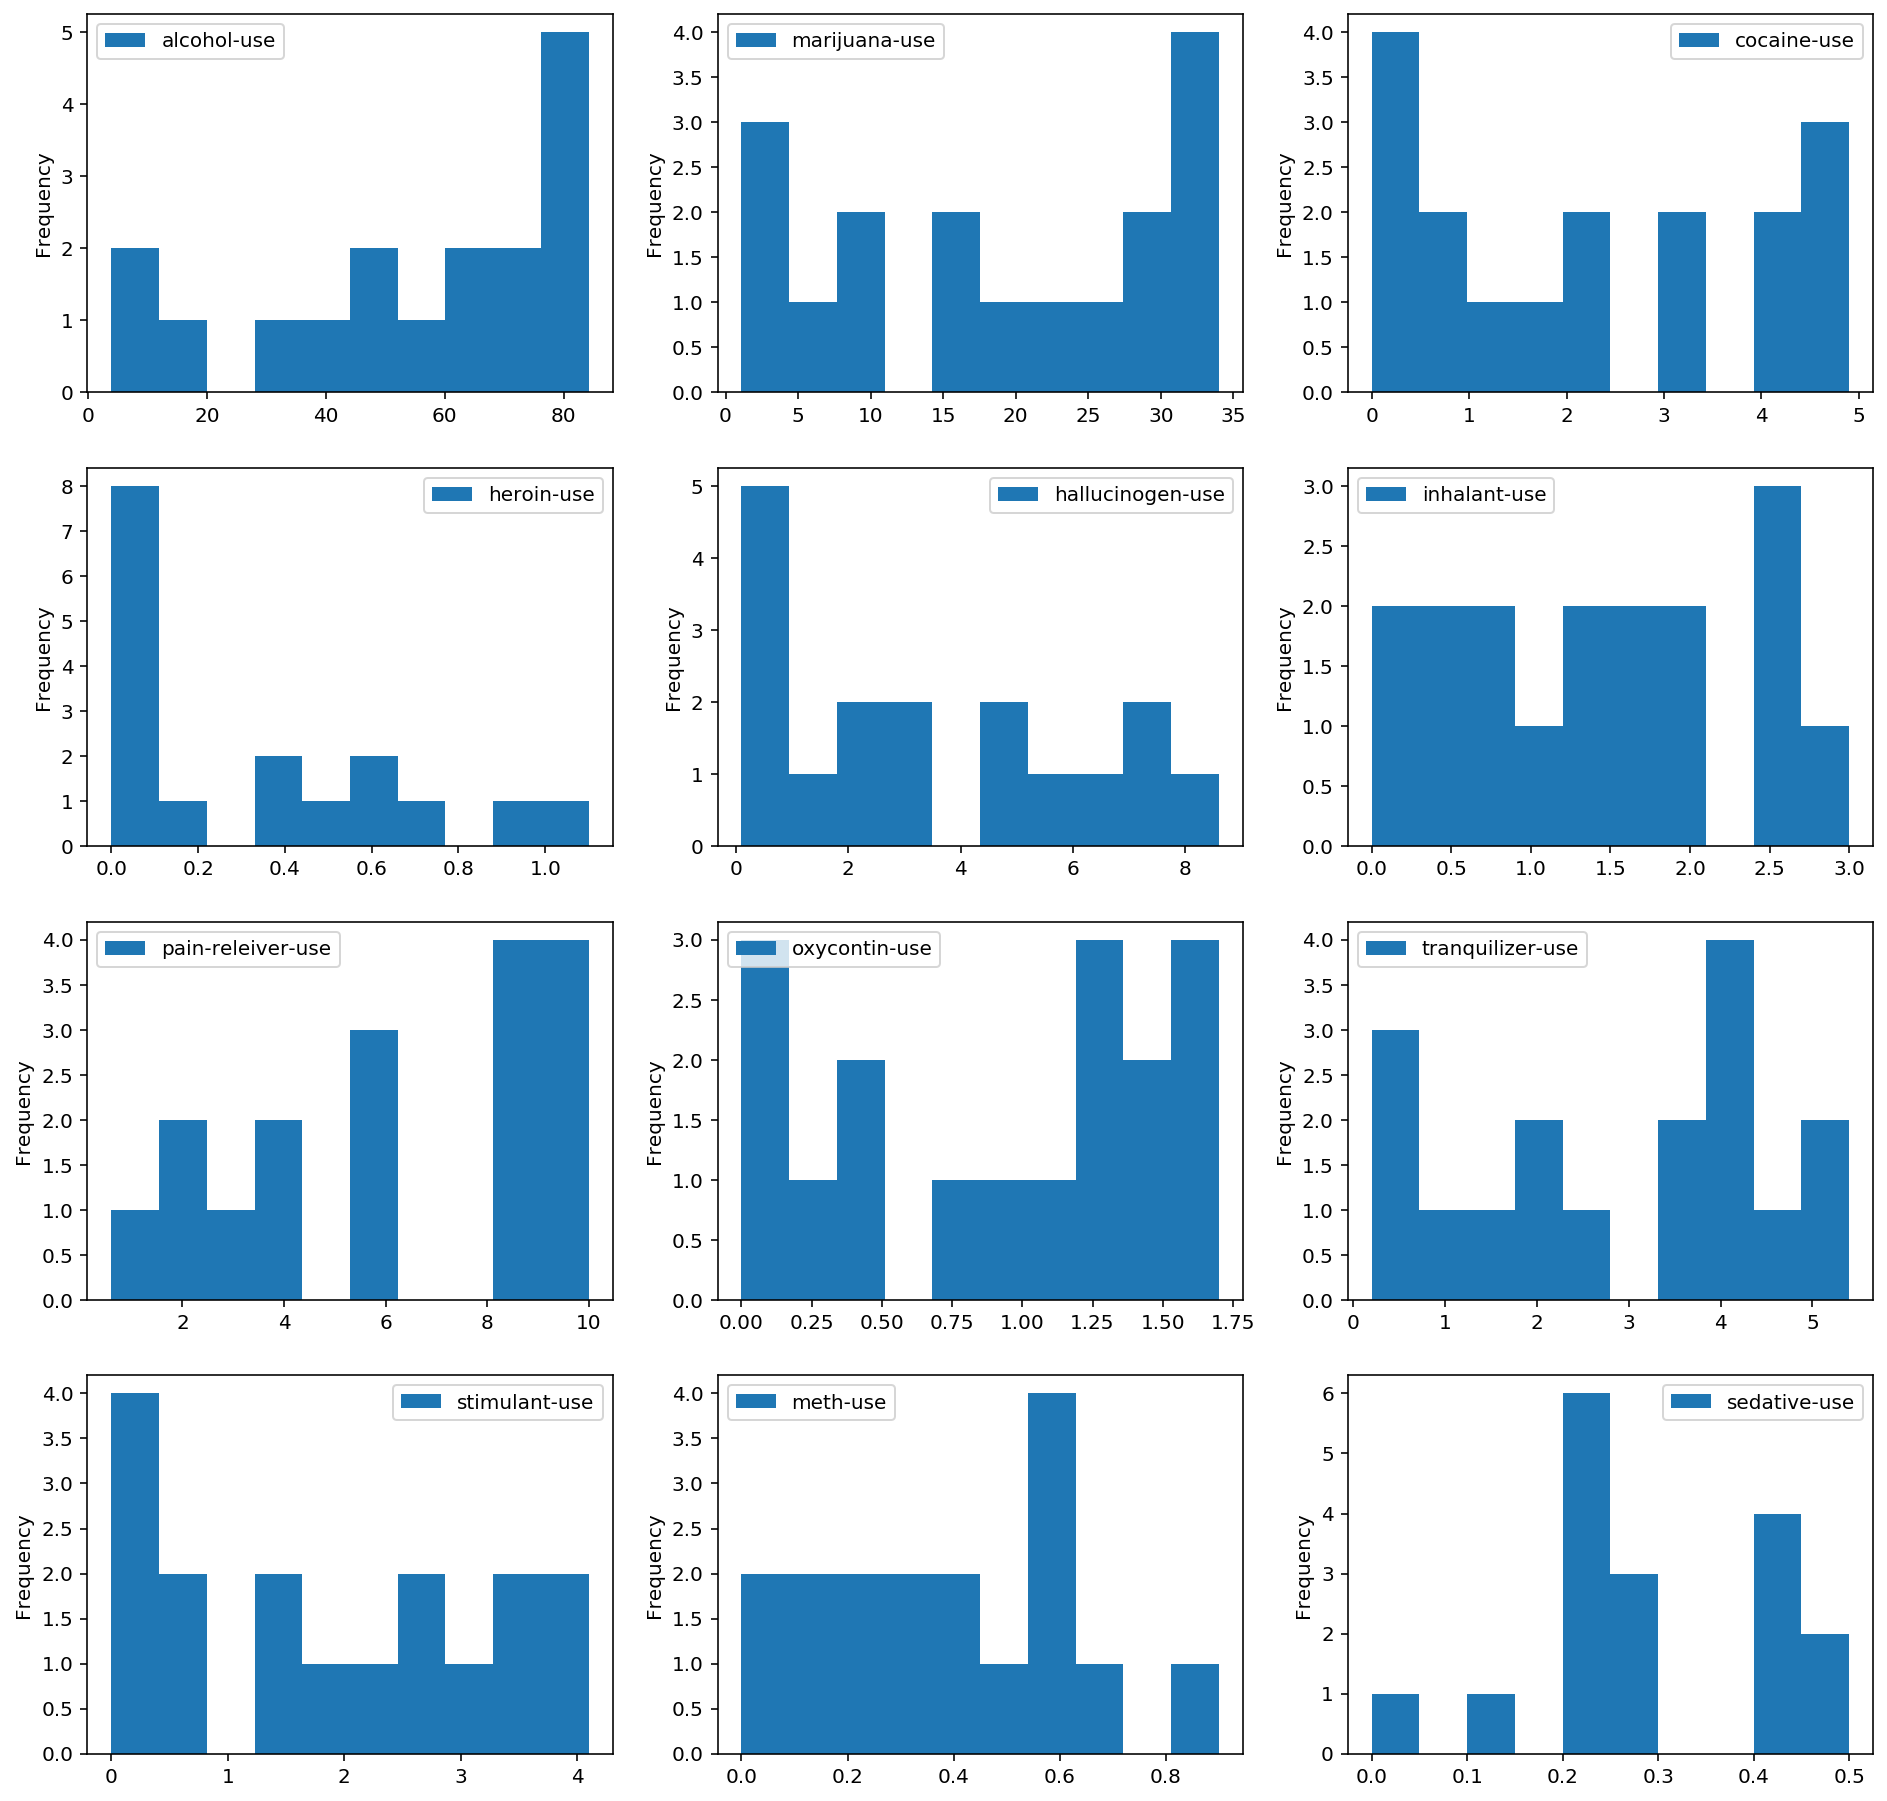

In [74]:
#Histograms of different drug use by age category to understand use distributions. 
#Probably the most useful given the nature of the data set where each row represents a sub-sample
fig, axes = plt.subplots(4,3, figsize=(16,16))
drug_cleaned.plot(y='alcohol-use', kind='hist', ax=axes[0][0])
drug_cleaned.plot(y='marijuana-use', kind='hist', ax=axes[0][1])
drug_cleaned.plot(y='cocaine-use', kind='hist', ax=axes[0][2])
drug_cleaned.plot(y='heroin-use', kind='hist', ax=axes[1][0])
drug_cleaned.plot(y='hallucinogen-use', kind='hist', ax=axes[1][1])
drug_cleaned.plot(y='inhalant-use', kind='hist', ax=axes[1][2])
drug_cleaned.plot(y='pain-releiver-use', kind='hist', ax=axes[2][0])
drug_cleaned.plot(y='oxycontin-use', kind='hist', ax=axes[2][1])
drug_cleaned.plot(y='tranquilizer-use', kind='hist', ax=axes[2][2])
drug_cleaned.plot(y='stimulant-use', kind='hist', ax=axes[3][0])
drug_cleaned.plot(y='meth-use', kind='hist', ax=axes[3][1])
drug_cleaned.plot(y='sedative-use', kind='hist', ax=axes[3][2])

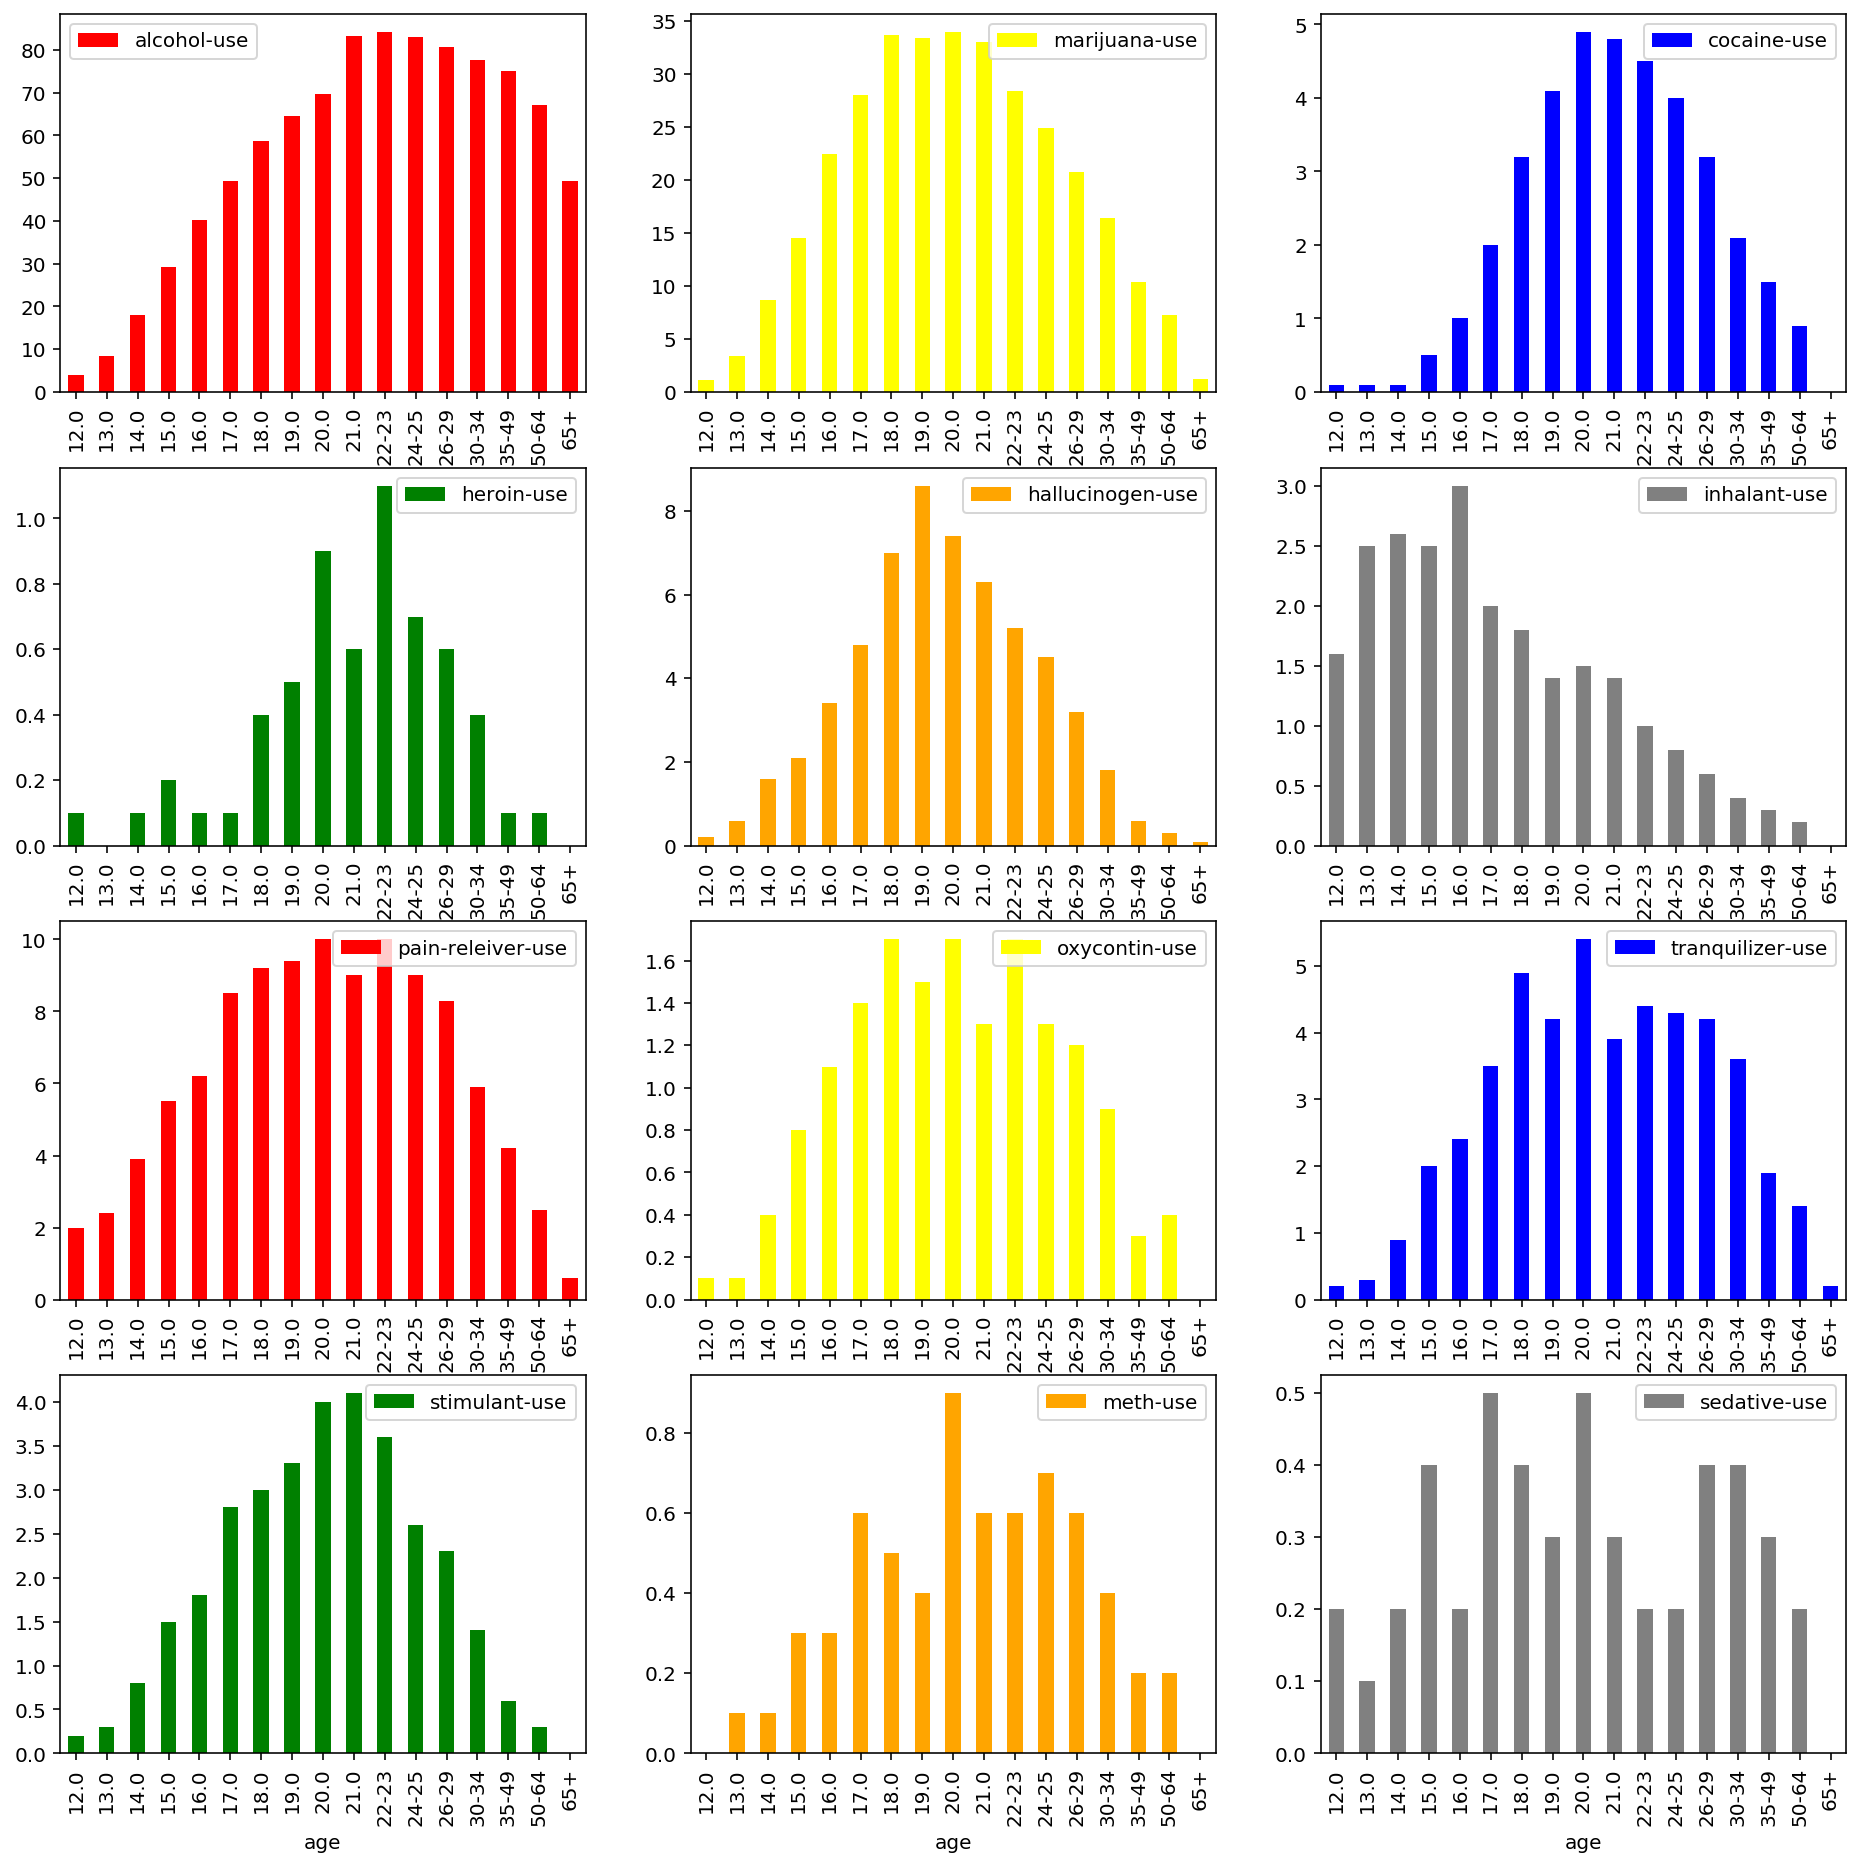

In [75]:
#Plots different drug use percentage by age category. 
#Assumed to represent percentage use of population in preceeding 12 months. 
fig, axes = plt.subplots(4,3, figsize=(16,16))
drug_cleaned.plot(x='age', y='alcohol-use', kind='bar', ax=axes[0][0], color='red')
drug_cleaned.plot(x='age', y='marijuana-use', kind='bar', ax=axes[0][1], color='yellow')
drug_cleaned.plot(x='age', y='cocaine-use', kind='bar', ax=axes[0][2], color='blue')
drug_cleaned.plot(x='age', y='heroin-use', kind='bar', ax=axes[1][0], color='green')
drug_cleaned.plot(x='age', y='hallucinogen-use', kind='bar', ax=axes[1][1], color='orange')
drug_cleaned.plot(x='age', y='inhalant-use', kind='bar', ax=axes[1][2], color='grey')
drug_cleaned.plot(x='age', y='pain-releiver-use', kind='bar', ax=axes[2][0], color='red')
drug_cleaned.plot(x='age', y='oxycontin-use', kind='bar', ax=axes[2][1], color='yellow')
drug_cleaned.plot(x='age', y='tranquilizer-use', kind='bar', ax=axes[2][2], color='blue')
drug_cleaned.plot(x='age', y='stimulant-use', kind='bar', ax=axes[3][0], color='green')
drug_cleaned.plot(x='age', y='meth-use', kind='bar', ax=axes[3][1], color='orange')
drug_cleaned.plot(x='age', y='sedative-use', kind='bar', ax=axes[3][2], color='grey')

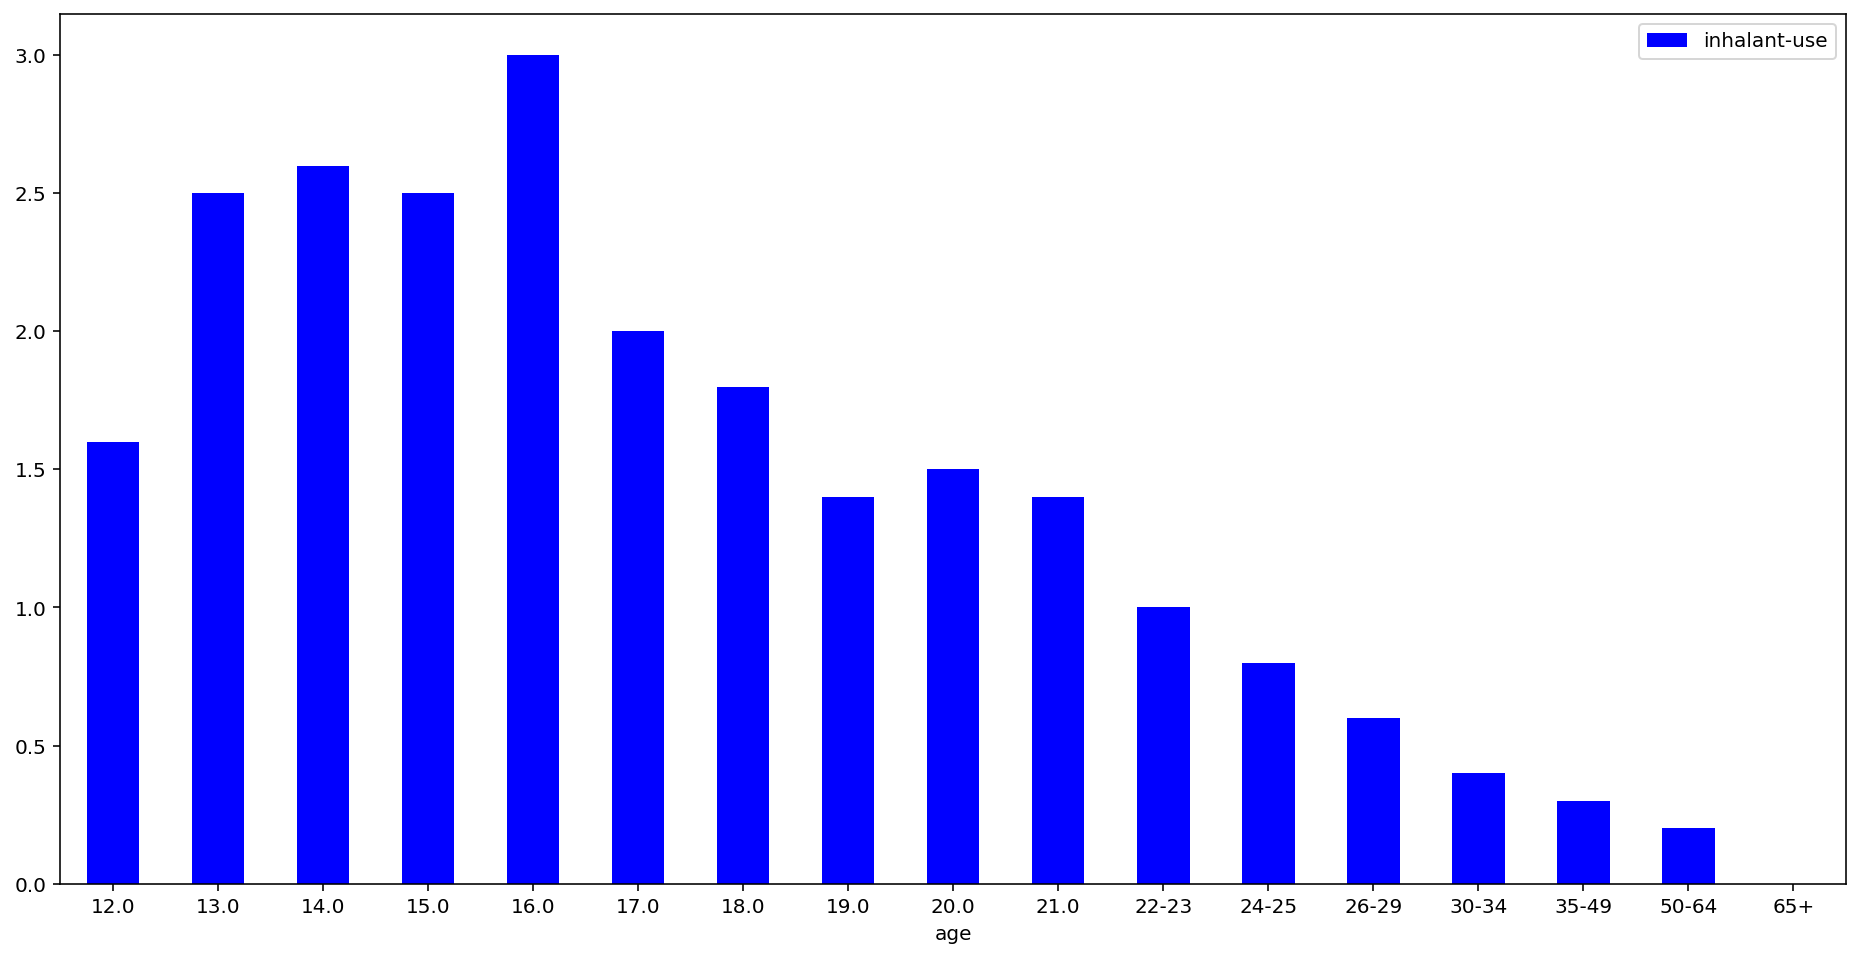

In [76]:
drug_cleaned.plot(x='age', y='inhalant-use', kind='bar', color='blue',figsize=(16,8), rot=0)

**Take aways**

* Bar charts indicate that drug type use varies according to age. For example, inhalent shows higher rates of use in the last 12 months amongst teenagers (13-16) peaking at 16 years of age (3% use) and declines from here.
* As people get older, generally use declines across all drug types. 
* In general, higher rates of use are observed across all drug types in young adults (18-25).

In [77]:
#Correlation matrix for drug use categories
drug_cleaned[['alcohol-use',
              'marijuana-use',
              'cocaine-use',
              'crack-use',
              'heroin-use',
              'hallucinogen-use',
              'inhalant-use',
              'pain-releiver-use',
              'oxycontin-use',
              'tranquilizer-use',
              'stimulant-use',
              'meth-use',
              'sedative-use']].corr().round(decimals=2)

alcohol-use  marijuana-use  cocaine-use  crack-use  \
alcohol-use               1.00           0.59         0.77       0.88   
marijuana-use             0.59           1.00         0.88       0.62   
cocaine-use               0.77           0.88         1.00       0.84   
crack-use                 0.88           0.62         0.84       1.00   
heroin-use                0.68           0.71         0.90       0.75   
hallucinogen-use          0.46           0.96         0.86       0.56   
inhalant-use             -0.65           0.13        -0.21      -0.54   
pain-releiver-use         0.62           0.97         0.91       0.65   
oxycontin-use             0.59           0.97         0.87       0.60   
tranquilizer-use          0.74           0.94         0.92       0.77   
stimulant-use             0.58           0.97         0.92       0.62   
meth-use                  0.68           0.87         0.89       0.69   
sedative-use              0.32           0.62         0.46       0.44   

                   heroin-use  hallucinogen-use  inhalant-use  \
alcohol-use              0.68              0.46         -0.65   
marijuana-use            0.71              0.96          0.13   
cocaine-use              0.90              0.86         -0.21   
crack-use                0.75              0.56         -0.54   
heroin-use               1.00              0.68         -0.22   
hallucinogen-use         0.68              1.00          0.17   
inhalant-use            -0.22              0.17          1.00   
pain-releiver-use        0.81              0.91          0.09   
oxycontin-use            0.78              0.92          0.11   
tranquilizer-use         0.82              0.86         -0.10   
stimulant-use            0.81              0.94          0.11   
meth-use                 0.82              0.78         -0.06   
sedative-use             0.33              0.52          0.11   

                   pain-releiver-use  oxycontin-use  tranquilizer-use  \
alcohol-use                     0.62           0.59              0.74   
marijuana-use                   0.97           0.97              0.94   
cocaine-use                     0.91           0.87              0.92   
crack-use                       0.65           0.60              0.77   
heroin-use                      0.81           0.78              0.82   
hallucinogen-use                0.91           0.92              0.86   
inhalant-use                    0.09           0.11             -0.10   
pain-releiver-use               1.00           0.98              0.96   
oxycontin-use                   0.98           1.00              0.96   
tranquilizer-use                0.96           0.96              1.00   
stimulant-use                   0.96           0.95              0.91   
meth-use                        0.92           0.90              0.94   
sedative-use                    0.64           0.63              0.67   

                   stimulant-use  meth-use  sedative-use  
alcohol-use                 0.58      0.68          0.32  
marijuana-use               0.97      0.87          0.62  
cocaine-use                 0.92      0.89          0.46  
crack-use                   0.62      0.69          0.44  
heroin-use                  0.81      0.82          0.33  
hallucinogen-use            0.94      0.78          0.52  
inhalant-use                0.11     -0.06          0.11  
pain-releiver-use           0.96      0.92          0.64  
oxycontin-use               0.95      0.90          0.63  
tranquilizer-use            0.91      0.94          0.67  
stimulant-use               1.00      0.89          0.57  
meth-use                    0.89      1.00          0.66  
sedative-use                0.57      0.66          1.00

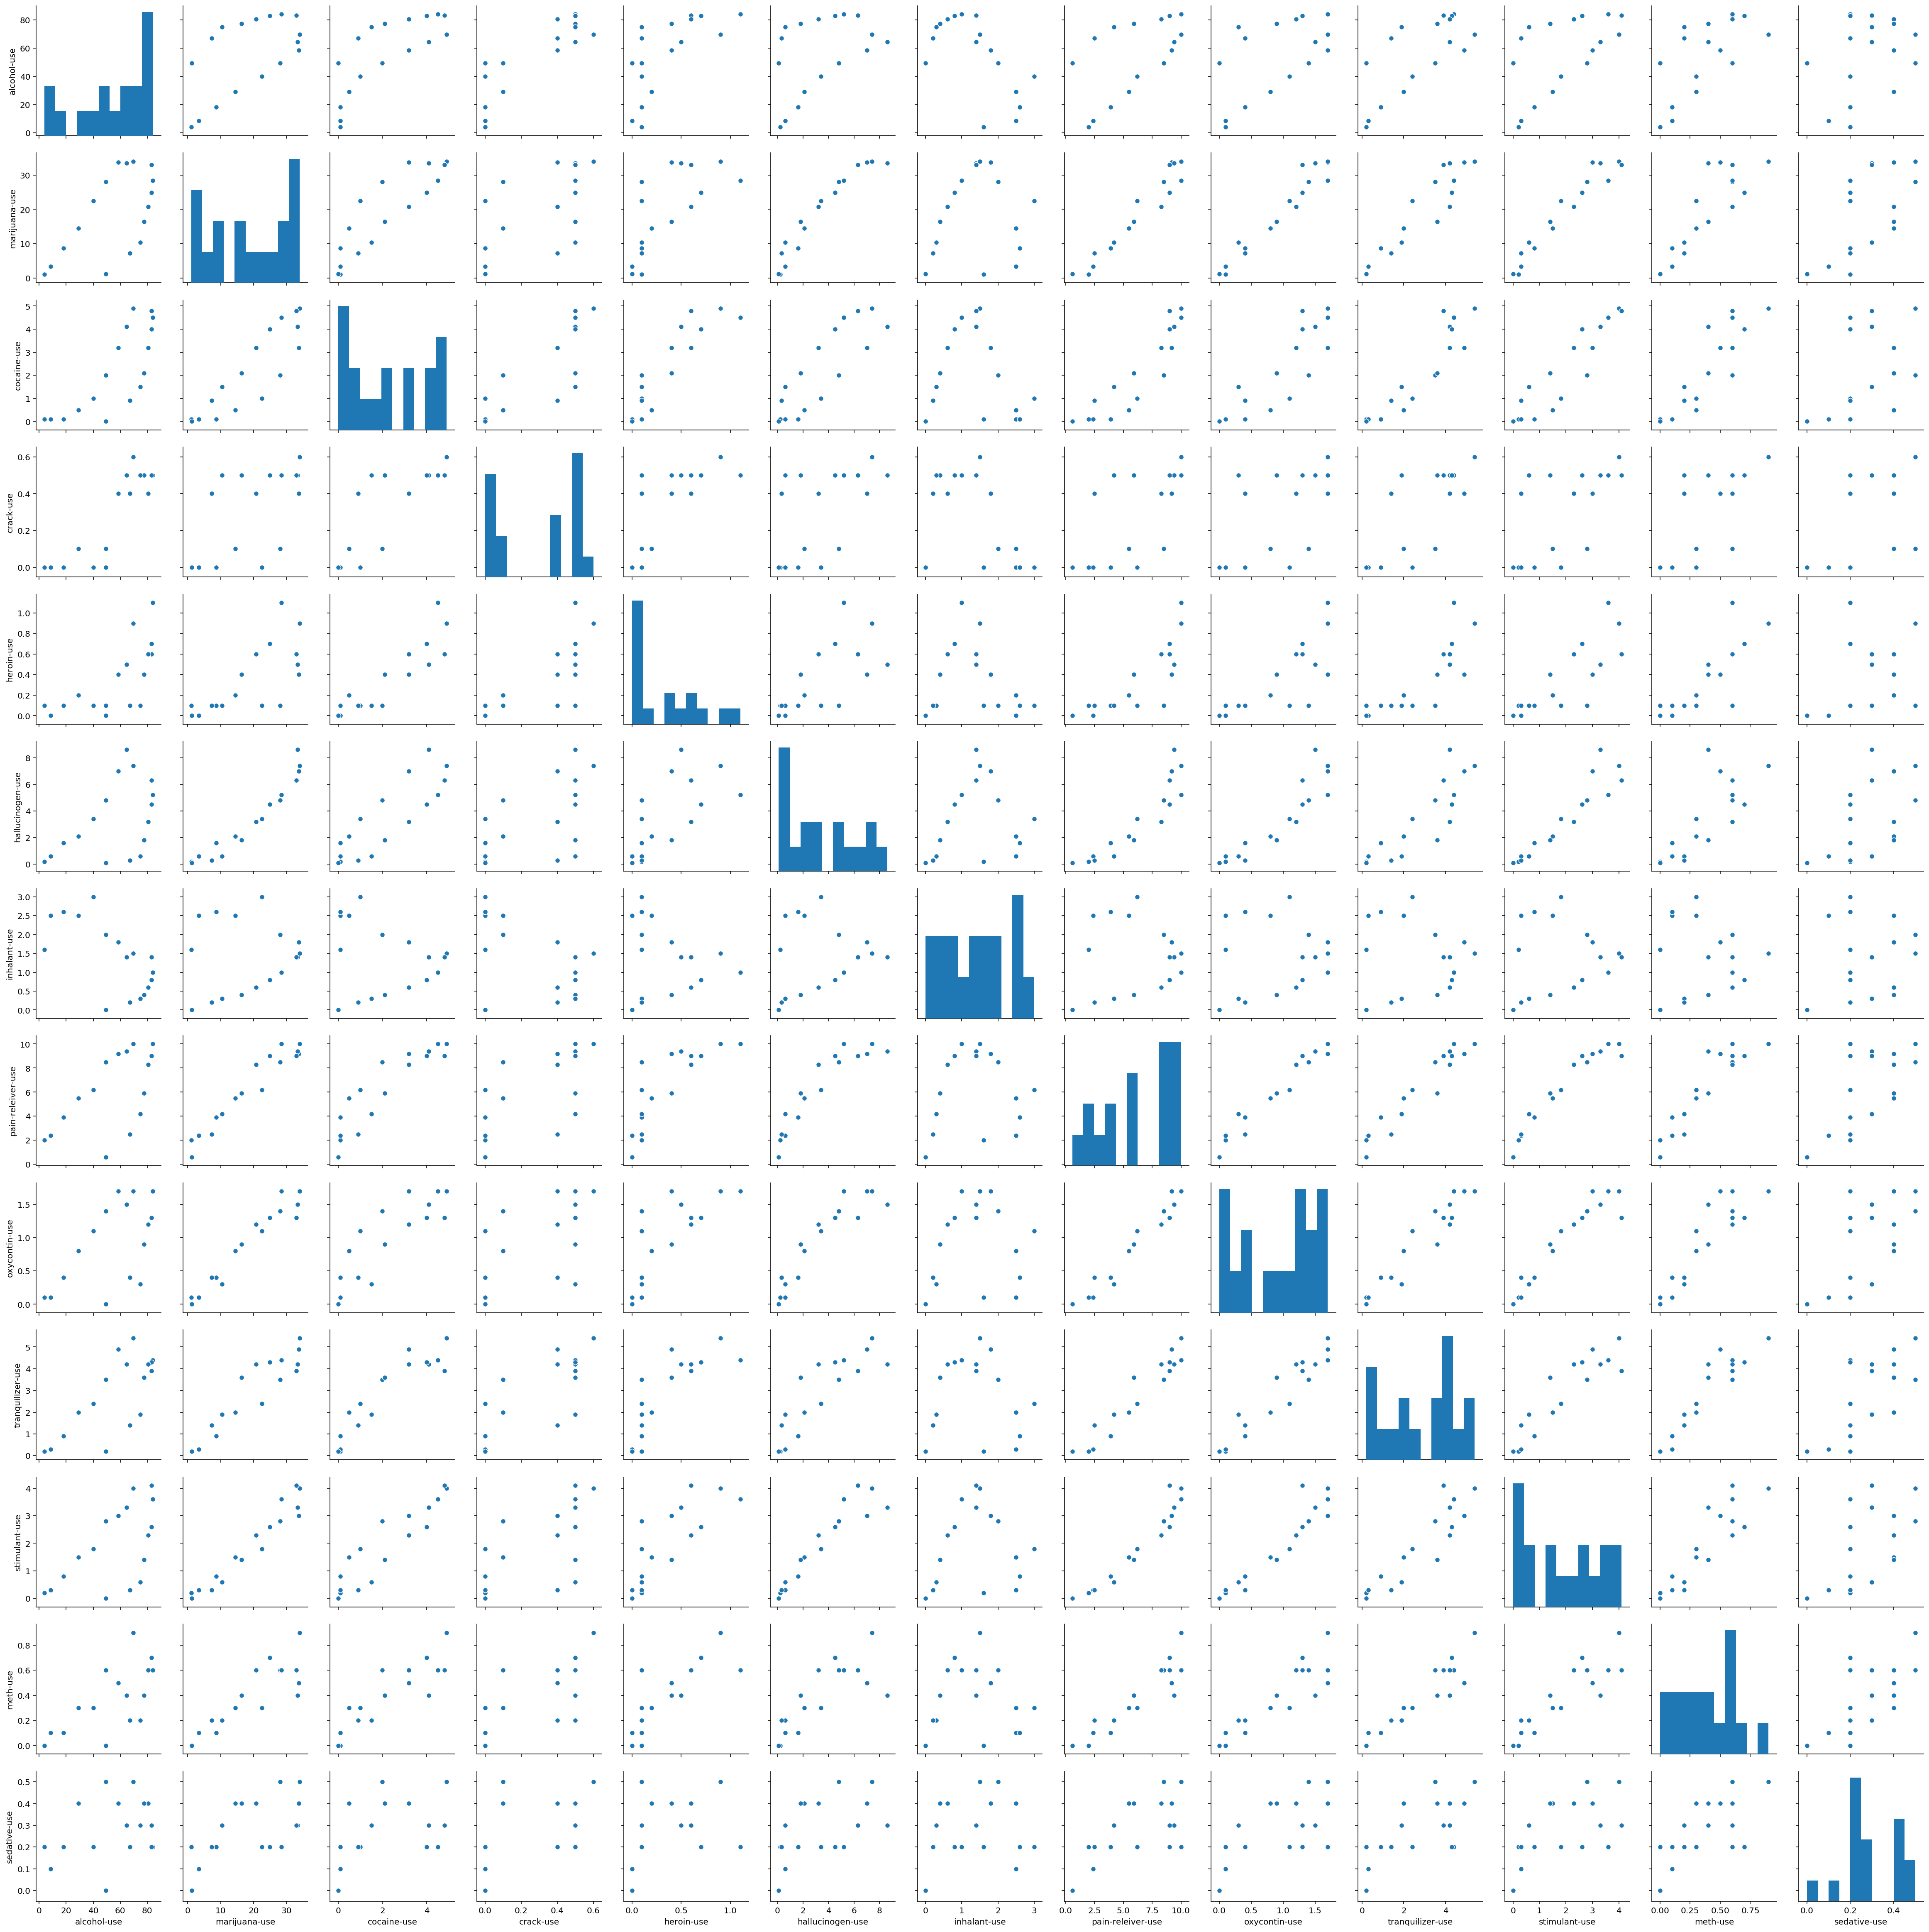

In [78]:
#Correlation matrix for drug use categories
sns.pairplot(drug_cleaned[['alcohol-use',
              'marijuana-use',
              'cocaine-use',
              'crack-use',
              'heroin-use',
              'hallucinogen-use',
              'inhalant-use',
              'pain-releiver-use',
              'oxycontin-use',
              'tranquilizer-use',
              'stimulant-use',
              'meth-use',
              'sedative-use']])

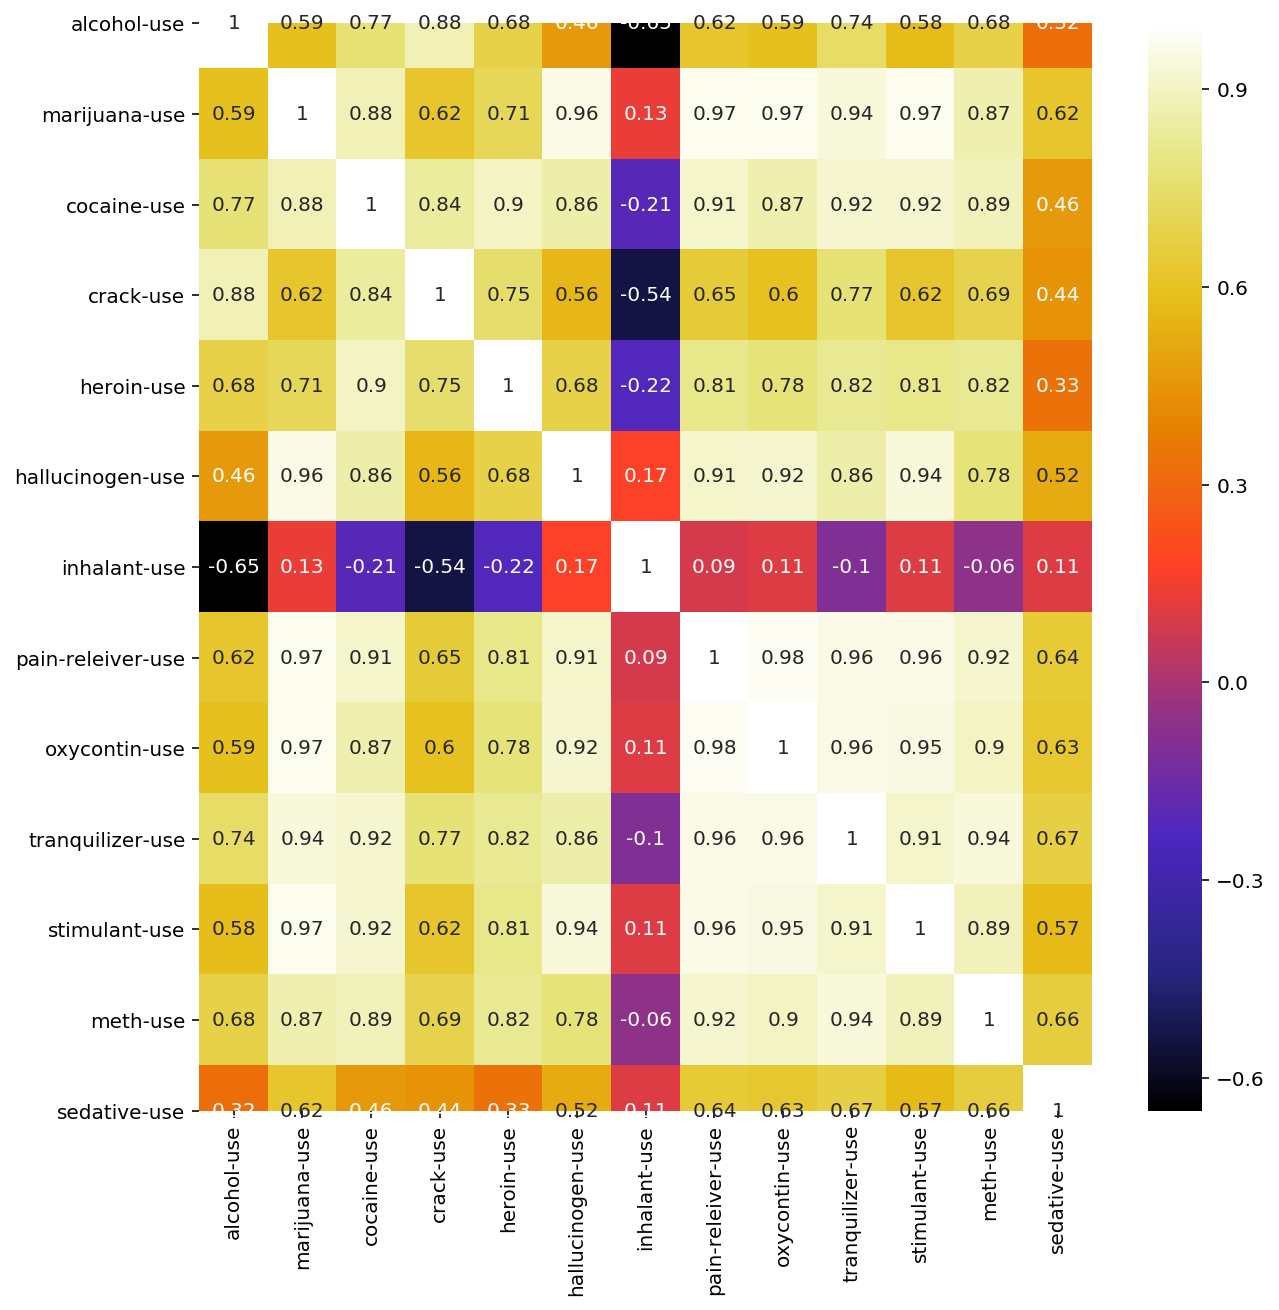

In [79]:
drug_use_correlations = drug_cleaned[[
              'alcohol-use',
              'marijuana-use',
              'cocaine-use',
              'crack-use',
              'heroin-use',
              'hallucinogen-use',
              'inhalant-use',
              'pain-releiver-use',
              'oxycontin-use',
              'tranquilizer-use',
              'stimulant-use',
              'meth-use',
              'sedative-use']].corr().round(decimals=2)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(drug_use_correlations, annot=True, cmap='CMRmap')

**Take aways**
* Overall, generally use of the different drug types all positively correlate together (i.e. as one type of drug use increases, so does another at the overall sample level). However, one of the key drug types that appears to be counter to this is inhalant use, which shows negative relationships with use of alcohol (strong), cocaine (weak), crack (strong), and heroin (weak). This suggests that inhalant use should be more fully investigated as to the characteristics of these drug users. As indicated above, this is likely to be due higher use amongst younger demographics (13-17) due to increased access to these types of drugs in general (e.g. solvents such as petrol or glue, aerosols, gases such as butane lighters).

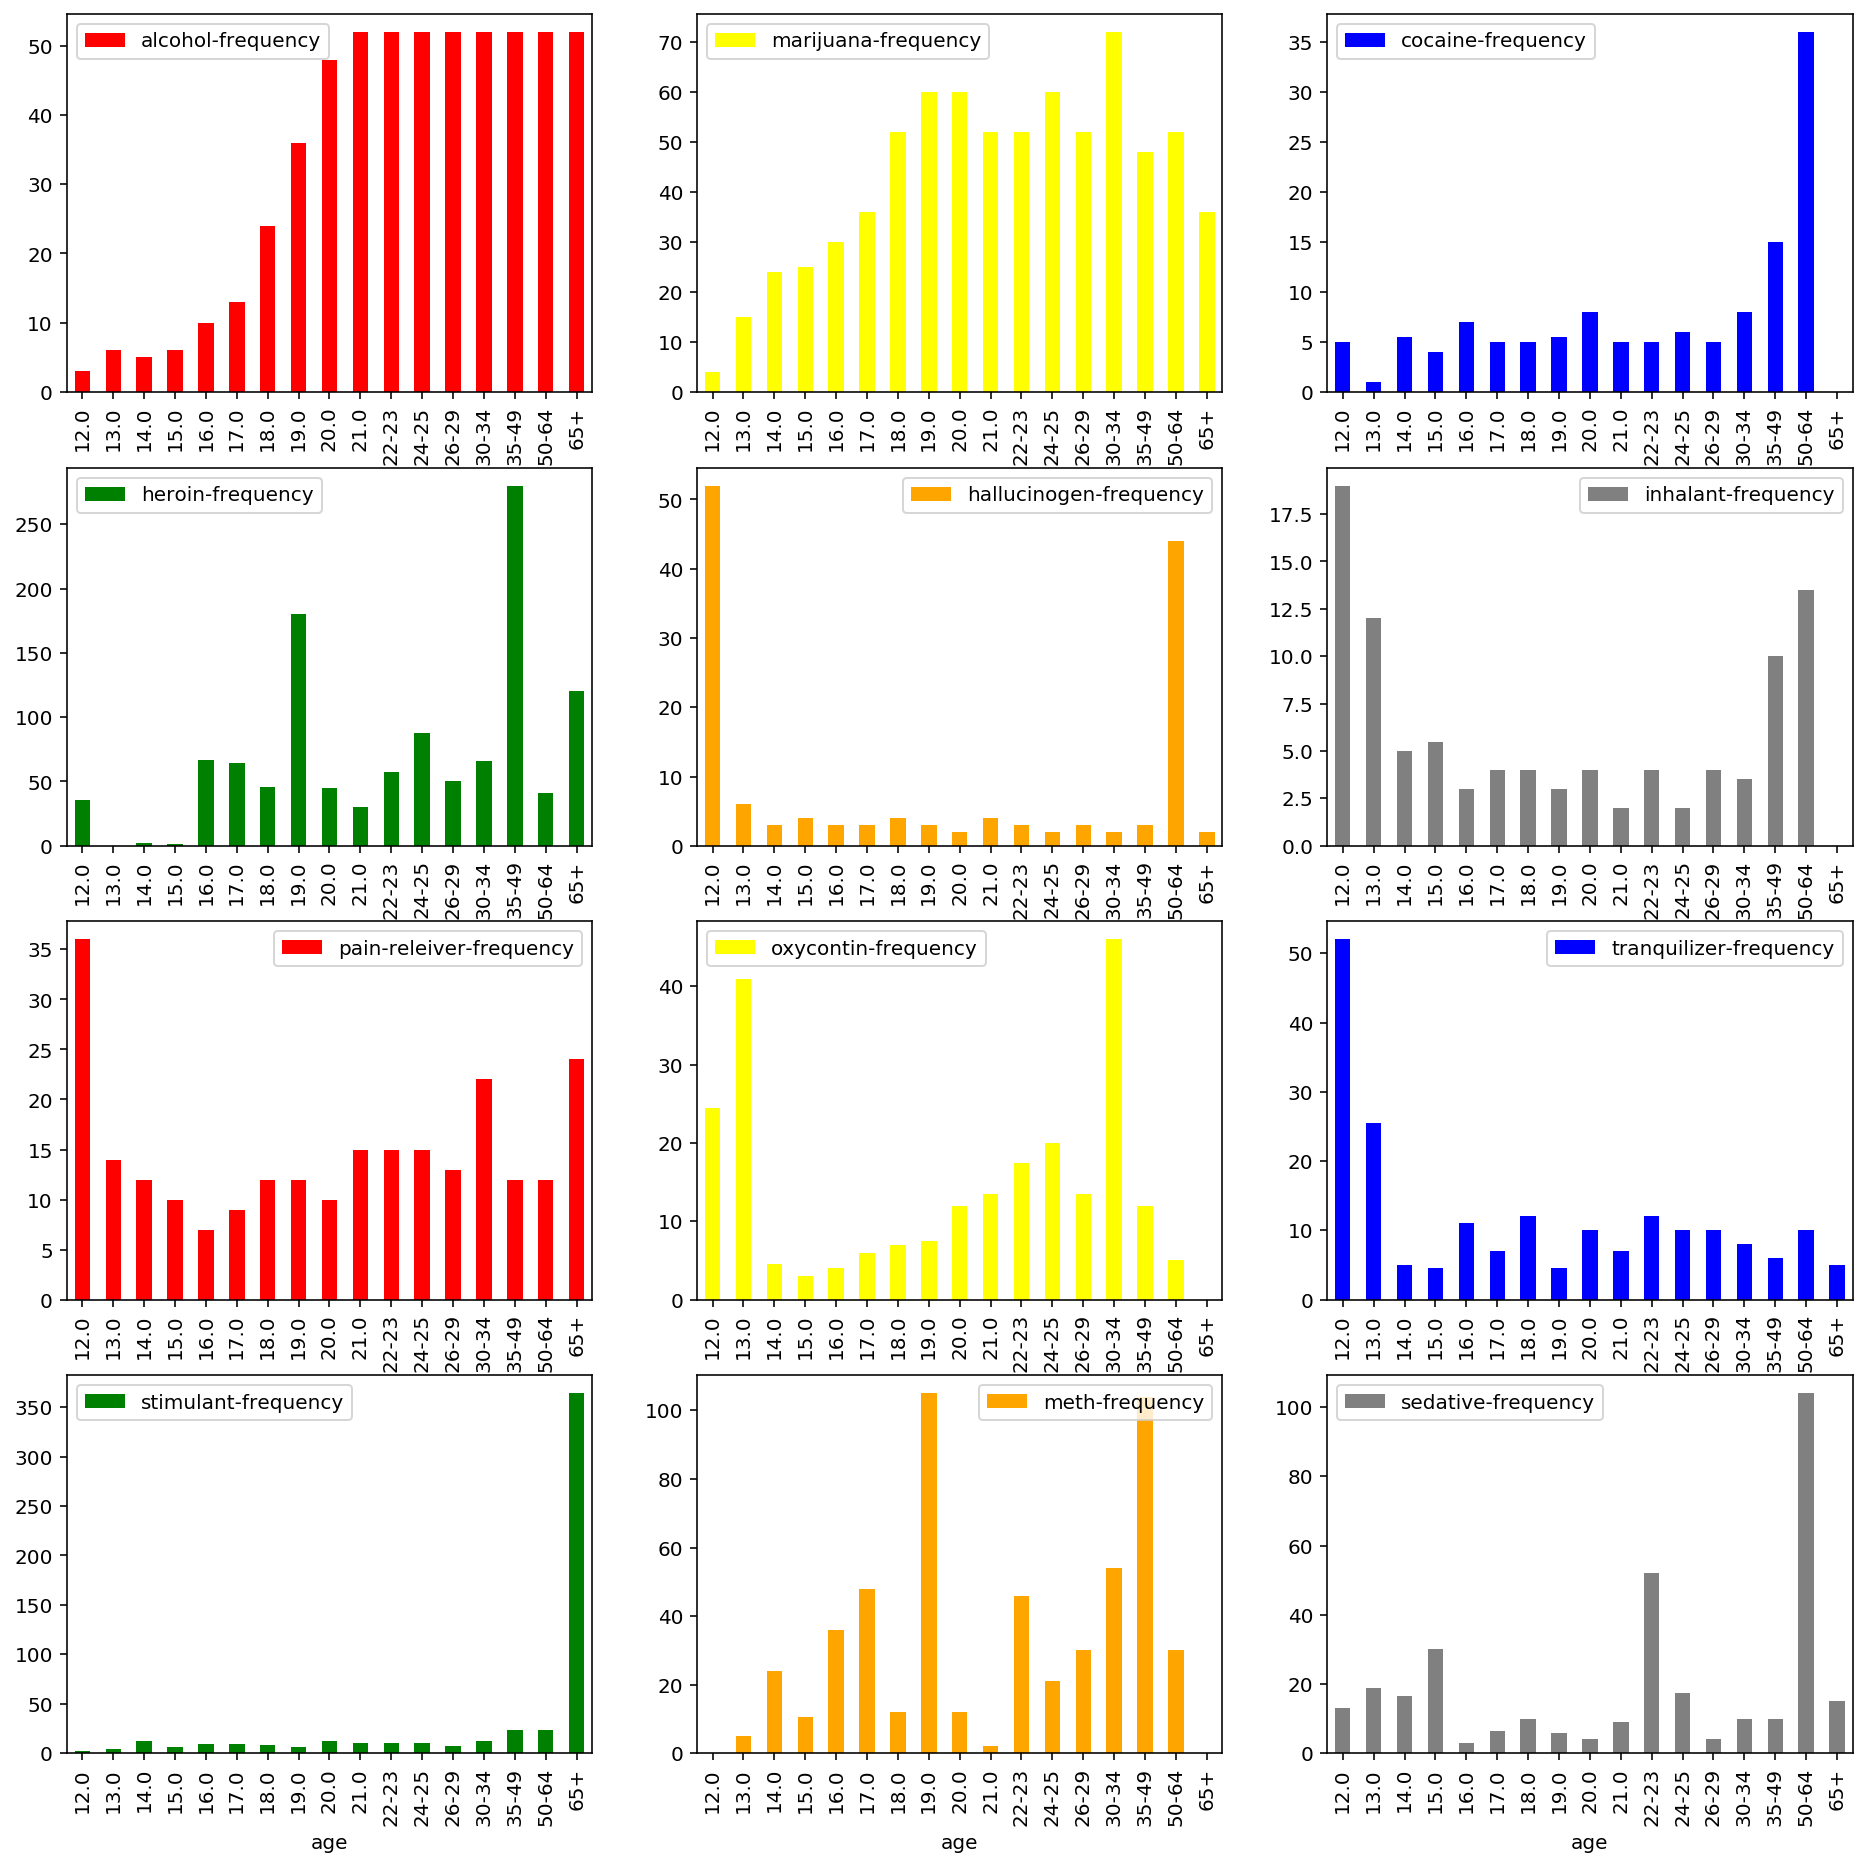

In [80]:
#Plots different drug frequency by age category. 
fig, axes = plt.subplots(4,3, figsize=(16,16))
drug_cleaned.plot(x='age', y='alcohol-frequency', kind='bar', ax=axes[0][0], color='red')
drug_cleaned.plot(x='age', y='marijuana-frequency', kind='bar', ax=axes[0][1], color='yellow')
drug_cleaned.plot(x='age', y='cocaine-frequency', kind='bar', ax=axes[0][2], color='blue')
drug_cleaned.plot(x='age', y='heroin-frequency', kind='bar', ax=axes[1][0], color='green')
drug_cleaned.plot(x='age', y='hallucinogen-frequency', kind='bar', ax=axes[1][1], color='orange')
drug_cleaned.plot(x='age', y='inhalant-frequency', kind='bar', ax=axes[1][2], color='grey')
drug_cleaned.plot(x='age', y='pain-releiver-frequency', kind='bar', ax=axes[2][0], color='red')
drug_cleaned.plot(x='age', y='oxycontin-frequency', kind='bar', ax=axes[2][1], color='yellow')
drug_cleaned.plot(x='age', y='tranquilizer-frequency', kind='bar', ax=axes[2][2], color='blue')
drug_cleaned.plot(x='age', y='stimulant-frequency', kind='bar', ax=axes[3][0], color='green')
drug_cleaned.plot(x='age', y='meth-frequency', kind='bar', ax=axes[3][1], color='orange')
drug_cleaned.plot(x='age', y='sedative-frequency', kind='bar', ax=axes[3][2], color='grey')

**Take Aways**
* Suggests that certain age groups, when used tend to certain drugs more frequently. For example, while overall cocaine use in previous 12 months for those in the 50-64 bracket declines to about 1% of the population, the overall frequency of use is the highest.  

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

**Question and deliverables**


* **Research question:** Are teenagers more likely to use inhalants compared to other age groups?


* **Backgroup:** Inhalants are breathable chemical vapors that can be inhaled to induce a psychoactive or mind-altering effect (National Institute on Drug Abuse, 2012). The easy accessibility and relatively low cost of inhalants are major reasons why they are most likely to be abused by children and adolescents (Ditmar, 2011). Indeed, previous research suggests that inhalants are among the most commonly used drugs among teenagers in the US (Nonnemaker, Crankshaw, Shive, Hussin, & Farrelly, 2011). As individuals move into young adult stage, they are more likely to have access to increased financial resources and be exposed to other forms of drugs. Thus, it may be that teenagers are more likely than other age groups to use inhalants for their psychological and physiological effects.


* **Key Definitions**
  * **Teenagers:** teenagers are defined at those aged 12-17 (inclusive)
  * **Older others:** older others are defined at those aged 18+ (inclusive)
  * **Inhalant use:** defined as the use of inhalants in preceding 12 month period
  

* **Hypothesis (H1):** Teenagers will have significantly higher rates of inhalant use in the previous 12 months than all other age groups. 


* **Deliverables:** 
  * Descriptive statistics for rate of inhalant use for overall sample, teenagers, and older others.
  * Hypothesis test for a proportion.
  * Bar chart of proportions.
  * Brief report on findings.


* **Notes** 
  * Directional hypothesis so 1-tailed test used
  * Alpha level (α) = .05
  * As have data set with averages use of inhlanet by age groups and the total number in each age group, t-tests will not work through the stats module as does not take into consideration respective sample sizes in calculations. Also any averaging will not take into consideration the sample sizes if I do the groupby command. Thus, will create two age groups (12-17 and other) and calculate the weighted average inhalant use for each and us this for comparison using proportion testing (valid as variable inhalant use cn be interpreted as a proportion or percentage).

In [81]:
#Create a new dataframe to work on
new_df = drug_cleaned.copy()
new_df

age       n  alcohol-use  alcohol-frequency  marijuana-use  \
0      12  2798.0          3.9                3.0            1.1   
1      13  2757.0          8.5                6.0            3.4   
2      14  2792.0         18.1                5.0            8.7   
3      15  2956.0         29.2                6.0           14.5   
4      16  3058.0         40.1               10.0           22.5   
5      17  3038.0         49.3               13.0           28.0   
6      18  2469.0         58.7               24.0           33.7   
7      19  2223.0         64.6               36.0           33.4   
8      20  2271.0         69.7               48.0           34.0   
9      21  2354.0         83.2               52.0           33.0   
10  22-23  4707.0         84.2               52.0           28.4   
11  24-25  4591.0         83.1               52.0           24.9   
12  26-29  2628.0         80.7               52.0           20.8   
13  30-34  2864.0         77.5               52.0           16.4   
14  35-49  7391.0         75.0               52.0           10.4   
15  50-64  3923.0         67.2               52.0            7.3   
16    65+  2448.0         49.3               52.0            1.2   

    marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
0                   4.0          0.1                5.0        0.0   
1                  15.0          0.1                1.0        0.0   
2                  24.0          0.1                5.5        0.0   
3                  25.0          0.5                4.0        0.1   
4                  30.0          1.0                7.0        0.0   
5                  36.0          2.0                5.0        0.1   
6                  52.0          3.2                5.0        0.4   
7                  60.0          4.1                5.5        0.5   
8                  60.0          4.9                8.0        0.6   
9                  52.0          4.8                5.0        0.5   
10                 52.0          4.5                5.0        0.5   
11                 60.0          4.0                6.0        0.5   
12                 52.0          3.2                5.0        0.4   
13                 72.0          2.1                8.0        0.5   
14                 48.0          1.5               15.0        0.5   
15                 52.0          0.9               36.0        0.4   
16                 36.0          0.0                NaN        0.0   

    crack-frequency  ...  oxycontin-frequency  tranquilizer-use  \
0               NaN  ...                 24.5               0.2   
1               3.0  ...                 41.0               0.3   
2               NaN  ...                  4.5               0.9   
3               9.5  ...                  3.0               2.0   
4               1.0  ...                  4.0               2.4   
5              21.0  ...                  6.0               3.5   
6              10.0  ...                  7.0               4.9   
7               2.0  ...                  7.5               4.2   
8               5.0  ...                 12.0               5.4   
9              17.0  ...                 13.5               3.9   
10              5.0  ...                 17.5               4.4   
11              6.0  ...                 20.0               4.3   
12              6.0  ...                 13.5               4.2   
13             15.0  ...                 46.0               3.6   
14             48.0  ...                 12.0               1.9   
15             62.0  ...                  5.0               1.4   
16              NaN  ...                  NaN               0.2   

    tranquilizer-frequency  stimulant-use  stimulant-frequency  meth-use  \
0                     52.0            0.2                  2.0       0.0   
1                     25.5            0.3                  4.0       0.1   
2                      5.0            0.8                 12.0       0.1   
3        

In [82]:
#Drop unnessessary columns
new_df.drop(['alcohol-use','alcohol-frequency',
              'marijuana-use',
              'marijuana-frequency',
              'cocaine-use',
              'cocaine-frequency', 
              'crack-use',
              'crack-frequency',
              'heroin-use',
              'heroin-frequency',
              'hallucinogen-use',
              'hallucinogen-frequency',
              'pain-releiver-use',
              'pain-releiver-frequency', 
              'oxycontin-use',
              'oxycontin-frequency',
              'tranquilizer-use',
              'tranquilizer-frequency',
              'stimulant-use',
              'stimulant-frequency',
              'meth-use',
              'meth-frequency',
              'sedative-use',
              'sedative-frequency'], axis=1, inplace=True)

In [83]:
#Test that columns correctly dropped
new_df

age       n  inhalant-use  inhalant-frequency    age bracket
0      12  2798.0           1.6                19.0      Teenagers
1      13  2757.0           2.5                12.0      Teenagers
2      14  2792.0           2.6                 5.0      Teenagers
3      15  2956.0           2.5                 5.5      Teenagers
4      16  3058.0           3.0                 3.0      Teenagers
5      17  3038.0           2.0                 4.0      Teenagers
6      18  2469.0           1.8                 4.0   Young Adults
7      19  2223.0           1.4                 3.0   Young Adults
8      20  2271.0           1.5                 4.0   Young Adults
9      21  2354.0           1.4                 2.0   Young Adults
10  22-23  4707.0           1.0                 4.0   Young Adults
11  24-25  4591.0           0.8                 2.0   Young Adults
12  26-29  2628.0           0.6                 4.0   Young Adults
13  30-34  2864.0           0.4                 3.5   Young Adults
14  35-49  7391.0           0.3                10.0  Middle Adults
15  50-64  3923.0           0.2                13.5   Older Adults
16    65+  2448.0           0.0                 NaN   Older Adults

In [84]:
#Create a new dictionary of age groups to compare 
dual_age_bracket = {
    'Teenagers': [12,13,14, 15,16,17],
    'Older Other': [18,19,20,21,'22-23','24-25','26-29','30-34','35-49','50-64', '65+']
}

In [85]:
#Adds a new variable to data set creates the two age groups for comparisons
for i in range(len(new_df)):
    for group in dual_age_bracket.keys():
        if new_df.loc[i,'age'] in (dual_age_bracket[group]):
            new_df.loc[i,'Grouping'] = group

#Checks that have been correctly added           
new_df

age       n  inhalant-use  inhalant-frequency    age bracket  \
0      12  2798.0           1.6                19.0      Teenagers   
1      13  2757.0           2.5                12.0      Teenagers   
2      14  2792.0           2.6                 5.0      Teenagers   
3      15  2956.0           2.5                 5.5      Teenagers   
4      16  3058.0           3.0                 3.0      Teenagers   
5      17  3038.0           2.0                 4.0      Teenagers   
6      18  2469.0           1.8                 4.0   Young Adults   
7      19  2223.0           1.4                 3.0   Young Adults   
8      20  2271.0           1.5                 4.0   Young Adults   
9      21  2354.0           1.4                 2.0   Young Adults   
10  22-23  4707.0           1.0                 4.0   Young Adults   
11  24-25  4591.0           0.8                 2.0   Young Adults   
12  26-29  2628.0           0.6                 4.0   Young Adults   
13  30-34  2864.0           0.4                 3.5   Young Adults   
14  35-49  7391.0           0.3                10.0  Middle Adults   
15  50-64  3923.0           0.2                13.5   Older Adults   
16    65+  2448.0           0.0                 NaN   Older Adults   

       Grouping  
0     Teenagers  
1     Teenagers  
2     Teenagers  
3     Teenagers  
4     Teenagers  
5     Teenagers  
6   Older Other  
7   Older Other  
8   Older Other  
9   Older Other  
10  Older Other  
11  Older Other  
12  Older Other  
13  Older Other  
14  Older Other  
15  Older Other  
16  Older Other

In [86]:
#Creates a groupby variables on the created Grouping column and then outputs sum of n values in each group
#sum is needed for use in proportion calculation later
test = new_df.groupby('Grouping')
older_adults_n = test['n'].sum()[0]
teenagers_n = test['n'].sum()[1]
print("The total n in teenagers aged 12-17 is", int(teenagers_n),"and for older adults group is",int(older_adults_n))

The total n in teenagers aged 12-17 is 17399 and for older adults group is 37869


In [87]:
#Create a subset of the new_df frame for teenagers only. 
teenager_mask = new_df[new_df['Grouping'] == "Teenagers"]

In [88]:
#Weights the inhalant use of all age groups by respective sample size of original age group amongst 
#those in teenager grouping. And uses these weights to calculate the overall proportion used by the 
#respective Teenager superordinate group

age_teen_weighting = []

for i in teenager_mask['n']:
    calc = i / teenagers_n
    age_teen_weighting.append(calc)

inhalant_use_teen = []

for i in teenager_mask['inhalant-use']:
    inhalant_use_teen.append(i)
# print(age_teen_weighting)
# print(inhalant_use_teen)

teenager_inh_use = list(zip(age_teen_weighting,inhalant_use_teen))
# print(teenager_inh_use)

weighted_teen_value = []

for i in teenager_inh_use:
    weighted_teen_value.append(i[0] * i[1])
    
teenager_inhalant_prop = sum(weighted_teen_value)/100

print("The proportion of teenagers (12-17) who have used inhalants in previous 12 months is",
      teenager_inhalant_prop.round(decimals=4),
      "or about",(teenager_inhalant_prop*100).round(decimals=2),"%")

The proportion of teenagers (12-17) who have used inhalants in previous 12 months is 0.0237 or about 2.37 %


In [89]:
older_mask = new_df[new_df['Grouping'] == "Older Other"]

In [90]:
#Weights the inhalant use of all age groups by respective sample size of original age group amongst 
#those in older other grouping. And uses these weights to calculate the overall proportion used by the 
#respective Older Other superordinate group

age_older_weighting = []

for i in older_mask['n']:
    calc = i / older_adults_n
    age_older_weighting.append(calc)

inhalant_use_older = []

for i in older_mask['inhalant-use']:
    inhalant_use_older.append(i)

older_inh_use = list(zip(age_older_weighting,inhalant_use_older))

weighted_older_value = []

for i in older_inh_use:
    weighted_older_value.append(i[0] * i[1])

older_inhalant_prop = sum(weighted_older_value)/100

print("The propotion of older other (18+) who have used inhalants in previous 12 months is",
      older_inhalant_prop.round(decimals=4),"or about",(older_inhalant_prop*100).round(decimals=2),"%")    

The propotion of older other (18+) who have used inhalants in previous 12 months is 0.0075 or about 0.75 %


In [91]:
total_n = sum(new_df['n'])

In [92]:
#Weights the inhalant use of all age groups by respective sample size of original age group amongst 
#those all ages groups. And uses these weights to calculate the overall proportion used by all age ages groups combined

all_weighting = []

for i in drug_cleaned['n']:
    calc = i / total_n
    all_weighting.append(calc)

inhalant_use_all = []

for i in new_df['inhalant-use']:
    inhalant_use_all.append(i)

all_inh_use = list(zip(all_weighting,inhalant_use_all))

weighted_all_value = []

for i in all_inh_use:
    weighted_all_value.append(i[0] * i[1])

all_inhalant_prop = sum(weighted_all_value)/100
    
print("The overall proportion of people who have used inhalants in previous 12 months is",all_inhalant_prop)

The overall proportion of people who have used inhalants in previous 12 months is 0.012598809437649273


Using the propotion formula, we can now calculate a z-test value and compare this to a required significance level (in this case 95%) to see if the difference between teenagers and older adults in inhalant use is significantly different.

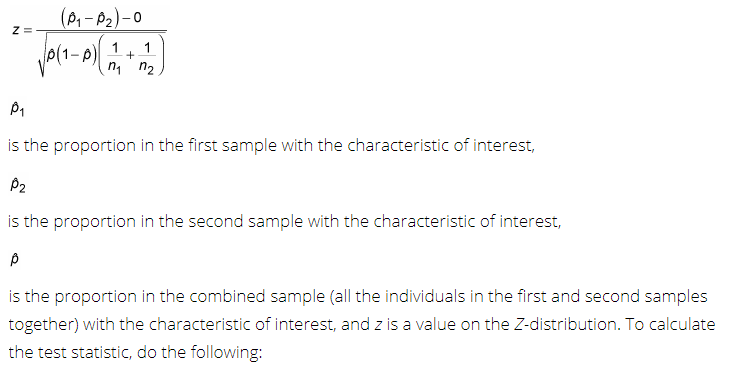

In [93]:
#This computes the z-test value to assess against the critical z-score value based on 
#the z-distribution (standard normal distribution)
z_test_obtained = ((teenager_inhalant_prop - older_inhalant_prop) - 0)/(np.sqrt(all_inhalant_prop * (1-all_inhalant_prop)*(1/teenagers_n + 1/older_adults_n)))
print("The z-obtained value is", z_test_obtained)

The z-obtained value is 15.887425632573278


In [94]:
p_value = stats.norm.sf(z_test_obtained)
print("The p-value associated with the z-obtained value is", p_value)

The p-value associated with the z-obtained value is 3.8721654050524665e-57


In [95]:
#Calculate z-test critical value associated with 1-tailed test at 95% level.
z_test_critical = stats.norm.ppf(.95)
print("The z-critical value that needs to be obtained for a 1-tailed test at 95% is:", z_test_critical)

The z-critical value that needs to be obtained for a 1-tailed test at 95% is: 1.6448536269514722


In [96]:
#Compare z obtained and z critical.
if z_test_obtained > z_test_critical:
    print("There is a significance difference between the propotions!\n:-):-):-):-):-):-):-):-)")
elif z_test_obtained < z_test_critical:
    print("There is NO significance difference between the propotions\n:-(:-(:-(:-(:-(:-(:-(:-(:-(")

There is a significance difference between the propotions!
:-):-):-):-):-):-):-):-)


In [97]:
plotting = pd.DataFrame([[(older_inhalant_prop*100).round(decimals=2),(teenager_inhalant_prop*100).round(decimals=2)]], 
                  columns=['Older Other', 'Teenagers'], index=['Inhalant use previous 12 months'])
plotting.head()

Older Other  Teenagers
Inhalant use previous 12 months         0.75       2.37

Text(0, 0.5, 'Percentage (%)')

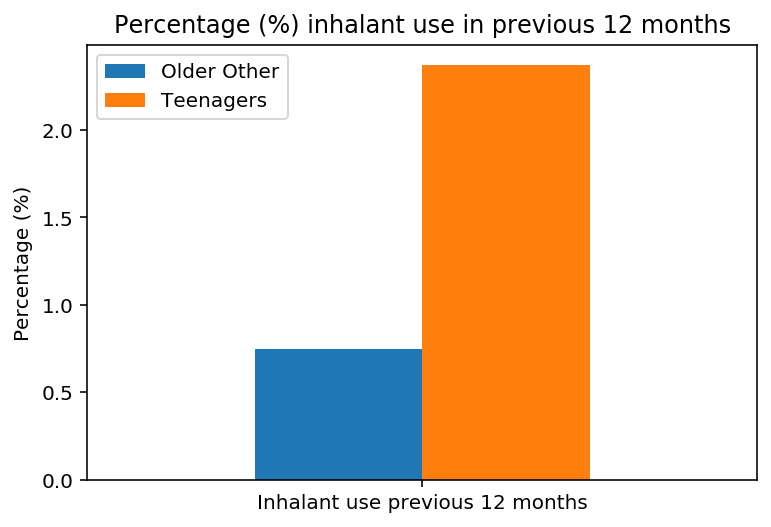

In [98]:
plotting.plot(kind='bar', rot='horizontal', title='Percentage (%) inhalant use in previous 12 months')
plt.ylabel('Percentage (%)') 

**Report**

The current analysis sought to answer the question whether teenagers are more likely to use inhalants compared to other age groups. Aligning to the hypothesis, teenagers (12-17 years of age) were significantly more likely to have used inhalants (2.37%) compared to those aged 18+ (0.75%) as revealed by a proportion test (z = 15.80, p < .001). This finding aligns with previous research that has also found inhalants to be commonly used among US teenagers (Nonnemaker et al., 2011). This higher use is likely to be due to the easy accessibility and relatively low cost of inhalants for teenagers.

While the overall use remains low as a percentage, there is approximatly 23.7 million aged between 12-17 in the US (https://www.childstats.gov/americaschildren/tables/pop1.asp) suggesting that approximatly 561,690 teenagers have used an inhalant in the previous 12 months in the US.  

**Uses:** These results suggest the need to for specific interventions to help reduce the use of inhalants among teenagers in the US. This may be through education campaigns in schools and/or reducing opportunities in the environment to their access.  

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [99]:
rate_series = pd.Series(cleaned_sat['Rate'])
rate_series.head()

0    82
1    81
2    79
3    77
4    72
Name: Rate, dtype: int64

In [100]:
rate_series.describe()

count    51.000000
mean     37.000000
std      27.550681
min       4.000000
25%       9.000000
50%      33.000000
75%      64.000000
max      82.000000
Name: Rate, dtype: float64

In [101]:
rate_series.quantile([0.25,0.5,.75])

0.25     9.0
0.50    33.0
0.75    64.0
Name: Rate, dtype: float64

In [102]:
#Calculate upper and lower bounds of outlier dection using 1.5*IQR definition
IQR_range = rate_series.quantile(0.75) - rate_series.quantile(0.25)
IQR_upper = (IQR_range * 1.5) + rate_series.quantile(0.75)
IQR_lower = rate_series.quantile(0.25) - (IQR_range * 1.5)
print('Using 1.5*IQR definition for outlier detection, the upper bound is', IQR_upper, 'and the lower bound is', IQR_lower)

Using 1.5*IQR definition for outlier detection, the upper bound is 146.5 and the lower bound is -73.5


In [103]:
outliers = []

for x in rate_series:
    if x > IQR_upper or x < IQR_lower:
        outliers.append(x)
outliers

[]

**ANSWER:** There are no outliers in the rate based on the IQR * 1.5 criteria. Therefore, no values have been passed to the outliers list for printing out.

In [104]:
#Also looking at the smallest and largest z-scores for each state, which is an alternative method for assessing outliers.
#Typically outliers via this method are defined as +/-3 standard deviations above or below the mean. 
#In this case, there also appears to be no outliers. 
z_sat_rate = pd.Series(cleaned_sat['Z_Rate'])
print(z_sat_rate.head(),z_sat_rate.tail())

0    1.649606
1    1.612948
2    1.539632
3    1.466317
4    1.283027
Name: Z_Rate, dtype: float64 46   -1.173053
47   -1.173053
48   -1.209711
49   -1.209711
50   -1.209711
Name: Z_Rate, dtype: float64


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [105]:
#We can calculate Spearman's correlation by simply changing the method attribute to 'spearman' for the .corr. 
cleaned_sat[['Verbal','Math']].corr(method='spearman').round(decimals=2)

Verbal  Math
Verbal    1.00  0.91
Math      0.91  1.00

In [106]:
spearman = stats.spearmanr(cleaned_sat[['Verbal','Math']])
spearman

SpearmanrResult(correlation=0.9094125143903472, pvalue=2.6565430361616923e-20)

**Answer**

* 1. Similar to the Pearson correlation, Spearman's correlation measures the relationship between two variables. Unlike the Pearson's correlation though, Spearman's does not make the assumption of a linear relationship between the variables nor that the level of measurment is at the interval or ratio level. Instead Spearmans can be used when we have ordinal level data (i.e. the observation are in a rank order but the distance between observations is not necessarily the same such who placed 1st, 2nd and 3rd in a race but the time between each racer is not necessarily the same) or when there is a non-linear but consistent relationship between the variables. In other words we look at the relationship between the rank of each observation across variables and see if there is a relationship.

    In the current case, the the Spearmans rank is .91, comapred to the Pearsons correlation calculated earlier which was .90. Thus, the calculations are quite similar, which is expected considering the scatterplot shows a strong linear relationship (vs. non-linear to which the Pearsons correlation would tend to underestimate the relationship).
    

* 2. To calculate Spearmans: (1) Rank order all observations on each variable (e.g. highest score ranked 1, second higest 2 etc). If there are tied values then the rank for observations is the mean of their ranked positions; (2) apply same forumla as Pearson's correlation on the ranked values though. Specifically, find the difference between each rank (d) across the two variables and then square this difference value (d2). Then sum up all d2 across all observations. Using the forumla below, enter in the d2 value into the formula and find n (total number of observations) and calculate out the formula. 

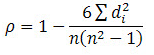



### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [107]:
#Using the percentile of score function from the scipy library, calculates 
#percentile rank for each rate observation and appends to a list and then 
#adds this list to the cleaned_sat dataframe
percentile = []

for i in cleaned_sat['Rate']:
    percentile.append(stats.percentileofscore(cleaned_sat['Rate'],i,kind='mean'))

cleaned_sat['Ranked'] = percentile

In [108]:
#Shows the new Ranked column, which is the percentile rank of the state Rate
cleaned_sat

State  Rate  Verbal  Math    Z_Rate  Z_Verbal    Z_Math  \
0     CT    82     509   510  1.649606 -0.712322 -0.607938   
1     NJ    81     499   513  1.612948 -1.015059 -0.524442   
2     MA    79     511   515  1.539632 -0.651775 -0.468778   
3     NY    77     495   505  1.466317 -1.136154 -0.747098   
4     NH    72     520   516  1.283027 -0.379312 -0.440946   
5     RI    71     501   499  1.246369 -0.954512 -0.914090   
6     PA    71     500   499  1.246369 -0.984785 -0.914090   
7     VT    69     511   506  1.173053 -0.651775 -0.719266   
8     ME    69     506   500  1.173053 -0.803143 -0.886258   
9     VA    68     510   501  1.136395 -0.682048 -0.858426   
10    DE    67     501   499  1.099737 -0.954512 -0.914090   
11    MD    65     508   510  1.026422 -0.742596 -0.607938   
12    NC    65     493   499  1.026422 -1.196701 -0.914090   
13    GA    63     491   489  0.953106 -1.257249 -1.192410   
14    IN    60     499   501  0.843132 -1.015059 -0.858426   
15    SC    57     486   488  0.733158 -1.408617 -1.220242   
16    DC    56     482   474  0.696500 -1.529712 -1.609890   
17    OR    55     526   526  0.659842 -0.197669 -0.162626   
18    FL    54     498   499  0.623185 -1.045333 -0.914090   
19    WA    53     527   527  0.586527 -0.167396 -0.134794   
20    TX    53     493   499  0.586527 -1.196701 -0.914090   
21    HI    52     485   515  0.549869 -1.438891 -0.468778   
22    AK    51     514   510  0.513211 -0.560954 -0.607938   
23    CA    51     498   517  0.513211 -1.045333 -0.413114   
24    AZ    34     523   525 -0.109974 -0.288490 -0.190458   
25    NV    33     509   515 -0.146632 -0.712322 -0.468778   
26    CO    31     539   542 -0.219947  0.195889  0.282686   
27    OH    26     534   439 -0.403237  0.044520 -2.584010   
28    MT    23     539   539 -0.513211  0.195889  0.199190   
29    WV    18     527   512 -0.696500 -0.167396 -0.552274   
30    ID    17     543   542 -0.733158  0.316983  0.282686   
31    TN    13     562   553 -0.879790  0.892183  0.588838   
32    NM    13     551   542 -0.879790  0.559173  0.282686   
33    IL    12     576   589 -0.916448  1.316015  1.590789   
34    KY    12     550   550 -0.916448  0.528899  0.505342   
35    WY    11     547   545 -0.953106  0.438078  0.366182   
36    MI    11     561   572 -0.953106  0.861910  1.117646   
37    MN     9     580   589 -1.026422  1.437110  1.590789   
38    KS     9     577   580 -1.026422  1.346289  1.340301   
39    AL     9     559   554 -1.026422  0.801362  0.616670   
40    NE     8     562   568 -1.063080  0.892183  1.006318   
41    OK     8     567   561 -1.063080  1.043552  0.811494   
42    MO     8     577   577 -1.063080  1.346289  1.256806   
43    LA     7     564   562 -1.099737  0.952731  0.839326   
44    WI     6     584   596 -1.136395  1.558205  1.785613   
45    AR     6     562   550 -1.136395  0.892183  0.505342   
46    UT     5     575   570 -1.173053  1.285741  1.061982   
47    IA     5     593   603 -1.173053  1.830668  1.980437   
48    SD     4     577   582 -1.209711  1.346289  1.395965   
49    ND     4     592   599 -1.209711  1.800394  1.869109   
50    MS     4     566   551 -1.209711  1.013278  0.533174   

           Legal Requirement Legal Flag  Domain_Difference     Ranked  
0      SAT Legal Requirement          1                 -1  99.019608  
1   Neither Legally Required          0                -14  97.058824  
2   Neither Legally Required          0                 -4  95.098039  
3   Neither Legally Required          0                -10  93.137255  
4      SAT Legal Requirement          1                  4  91.176471  
5   Neither Legally Required          0                  2  88.235294  
6   Neither Legally Required          0                  1  88.235294  
7   Neither Legally Required          0                  5  84.313725  
8      SAT Legal Requirement          1                  6  84.313725  
9   Neither Legally Required          0                  9

In [109]:
cleaned_sat['State']=='CA'
CA = cleaned_sat[cleaned_sat.State == 'CA']
print("California has a percentile rank of",CA.iloc[0,9].round(decimals=2),'(rounded to 2dp)')

California has a percentile rank of -19 (rounded to 2dp)


**ANSWER** Percentile is related to Spearman's as the process involved in calculating Spearman's correlation involves converting all observations to their respective percentile rank prior to calculating the correlation coefficient.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

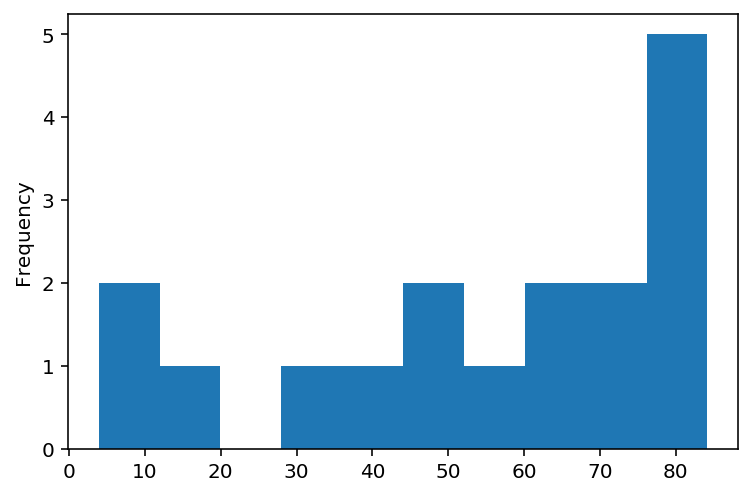

In [110]:
drug_cleaned['alcohol-use'].plot(kind='hist')

In [111]:
alcohol_rank = []

for i in drug_cleaned['alcohol-use']:
    alcohol_rank.append(stats.percentileofscore(drug_cleaned['alcohol-use'],i,kind='mean'))

drug_cleaned['Alcohol Use Percentile Rank'] = alcohol_rank

# drug_cleaned

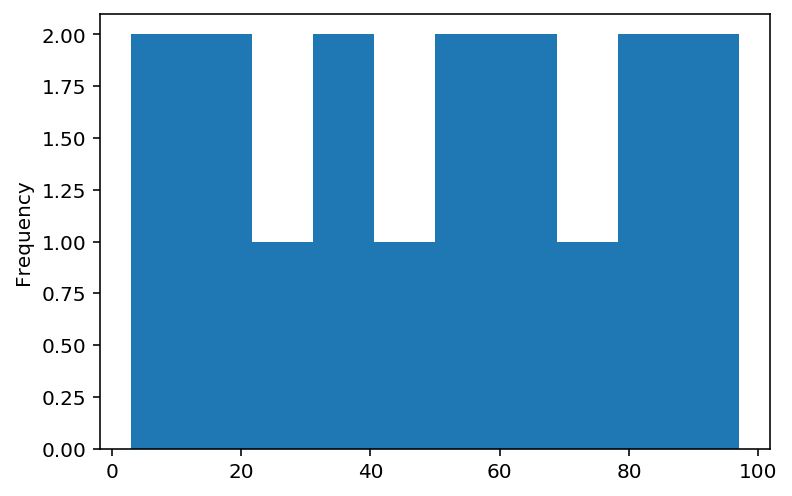

In [112]:
drug_cleaned['Alcohol Use Percentile Rank'].plot(kind='hist')

**ANSWERS**

* 1. As percentile rank provides a way of understanding the percentage of observations occuring below (and thus by simple subtraction also above) an observation, it is a way of understanding how many observations occur above and below a particular percentile (e.g. at the 1st percentile, 1% of observations are below this vs 50th percentile where 50% of observations are below this). Thus, you identify percentile ranks that are more and less likely to occur. 
* 4. When converting to percentile rank, the histogram will tend to create a box type distribution as observed in the histogram above vs. the distribution with the raw scores, which is more negatively skewed. 